Imports

In [3]:
from pathlib import Path
import importlib
from collections import defaultdict
import time
import pickle

import numpy as np
import pandas as pd
import scipy
from scipy.stats import pearsonr

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import pyBigWig
import pysam
import logomaker as lm

from Modules import utils, plot_utils

Global variables

In [4]:
importlib.reload(utils)
importlib.reload(plot_utils)
data_dir = '../shared_folder'
writing_dir = '../shared_folder'
# writing_dir='../'
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
# plt.rcParams.update({'axes.labelsize': 16})
# sns.set()

In [5]:
TOTALS = {}
def load_CPM(filename):
    bw = utils.load_bw(filename)
    tot = sum(np.sum(arr) for arr in bw.values())
    global TOTALS
    TOTALS[filename] = tot
    return {k: v * 1e6 / tot for k, v in bw.items()}

In [116]:
mnase2020_167 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250.bw')
mnase2020_197a = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250.bw')
mnase2020_197b = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.bw')
mnase2020_237_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250.bw')
mnase2020_237_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250.bw')

mnase2022_237sansD_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_trimfiltered_max250.bw')
mnase2022_237sansD_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_trimfiltered_max250.bw')
mnase2022_237D10_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_trimfiltered_max250.bw')
mnase2022_237D10_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_trimfiltered_max250.bw')
mnase2022_237D50_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_trimfiltered_max250.bw')
mnase2022_237D50_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_trimfiltered_max250.bw')

mnase2023_167_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250.bw')
mnase2023_167_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250.bw')
mnase2023_197a_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250.bw')
mnase2023_197a_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250.bw')
mnase2023_197b_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.bw')
mnase2023_197b_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.bw')
mnase2023_237_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.bw')
mnase2023_237_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250.bw')

mnase601_167 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250.bw')
mnase601_197 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250.bw')
mnase601_237 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250.bw')

rna2022_167 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_167_replacement_sample_lib568677_7920_2_trimfiltered_reads.bw')
rna2022_197a = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_1_lib556538_7886_1_trimfiltered_reads.bw')
rna2022_197b = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads.bw')
rna2022_237 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_237_lib556540_7886_1_trimfiltered_reads.bw')
rna2022_237sansD = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237sansD_lib587179_8045_2_trimfiltered_reads.bw')
rna2022_237D = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237D_lib587178_8045_2_trimfiltered_reads.bw')

rna2023_167 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_167_4_lib717029_10297_1_trimfiltered_reads.bw')
rna2023_197a = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_1_22_lib717030_10297_1_trimfiltered_reads.bw')
rna2023_197b = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads.bw')
rna2023_237 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_237_44_lib717032_10297_1_trimfiltered_reads.bw')

In [6]:
# mnase2020_167_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250_140-160.bw')
# mnase2020_197a_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250_140-160.bw')
# mnase2020_197b_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250_140-160.bw')
# mnase2020_237_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250_140-160.bw')
# mnase2020_237_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250_140-160.bw')

# mnase2022_237sansD_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_trimfiltered_max250_140-160.bw')
# mnase2022_237sansD_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_trimfiltered_max250_140-160.bw')
# mnase2022_237D10_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_trimfiltered_max250_140-160.bw')
# mnase2022_237D10_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_trimfiltered_max250_140-160.bw')
# mnase2022_237D50_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_trimfiltered_max250_140-160.bw')
# mnase2022_237D50_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_trimfiltered_max250_140-160.bw')

# mnase2023_167_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250_140-160.bw')
# mnase2023_167_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250_140-160.bw')
# mnase2023_197a_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250_140-160.bw')
# mnase2023_197a_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250_140-160.bw')
# mnase2023_197b_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250_140-160.bw')
# mnase2023_197b_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250_140-160.bw')
# mnase2023_237_1_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250_140-160.bw')
# mnase2023_237_2_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250_140-160.bw')

# mnase601_167_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250_140-160.bw')
# mnase601_197_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250_140-160.bw')
# mnase601_237_win = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250_140-160.bw')

rna2022_167_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_167_replacement_sample_lib568677_7920_2_trimfiltered_reads_for.bw')
rna2022_167_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_167_replacement_sample_lib568677_7920_2_trimfiltered_reads_rev.bw')
rna2022_197a_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_1_lib556538_7886_1_trimfiltered_reads_for.bw')
rna2022_197a_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_1_lib556538_7886_1_trimfiltered_reads_rev.bw')
rna2022_197b_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads_for.bw')
rna2022_197b_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads_rev.bw')
rna2022_237_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_237_lib556540_7886_1_trimfiltered_reads_for.bw')
rna2022_237_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_237_lib556540_7886_1_trimfiltered_reads_rev.bw')
# rna2022_237sansD_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237sansD_lib587179_8045_2_trimfiltered_reads_for.bw')
# rna2022_237sansD_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237sansD_lib587179_8045_2_trimfiltered_reads_rev.bw')
# rna2022_237D_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237D_lib587178_8045_2_trimfiltered_reads_for.bw')
# rna2022_237D_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237D_lib587178_8045_2_trimfiltered_reads_rev.bw')

rna2023_167_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_167_4_lib717029_10297_1_trimfiltered_reads_for.bw')
rna2023_167_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_167_4_lib717029_10297_1_trimfiltered_reads_rev.bw')
rna2023_197a_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_1_22_lib717030_10297_1_trimfiltered_reads_for.bw')
rna2023_197a_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_1_22_lib717030_10297_1_trimfiltered_reads_rev.bw')
rna2023_197b_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads_for.bw')
rna2023_197b_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads_rev.bw')
rna2023_237_for = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_237_44_lib717032_10297_1_trimfiltered_reads_for.bw')
rna2023_237_rev = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_237_44_lib717032_10297_1_trimfiltered_reads_rev.bw')

In [6]:
mnase2020_167_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250_140-170.bw')
mnase2020_197a_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250_140-170.bw')
mnase2020_197b_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250_140-170.bw')
mnase2020_237_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250_140-170.bw')
mnase2020_237_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250_140-170.bw')

mnase2022_237sansD_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_trimfiltered_max250_140-170.bw')
mnase2022_237sansD_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_trimfiltered_max250_140-170.bw')
mnase2022_237D10_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_trimfiltered_max250_140-170.bw')
mnase2022_237D10_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_trimfiltered_max250_140-170.bw')
mnase2022_237D50_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_trimfiltered_max250_140-170.bw')
mnase2022_237D50_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_trimfiltered_max250_140-170.bw')

mnase2023_167_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_167_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_197a_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_197a_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_197b_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_197b_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_237_1_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250_140-170.bw')
mnase2023_237_2_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250_140-170.bw')

mnase601_167_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250_140-170.bw')
mnase601_197_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250_140-170.bw')
mnase601_237_win2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250_140-170.bw')

In [4]:
mnase2020_167_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250_140-170_CPM.bw')
mnase2020_197a_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250_140-170_CPM.bw')
mnase2020_197b_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250_140-170_CPM.bw')
mnase2020_237_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250_140-170_CPM.bw')
mnase2020_237_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250_140-170_CPM.bw')

mnase2022_237sansD_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_trimfiltered_max250_140-170_CPM.bw')
mnase2022_237sansD_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_trimfiltered_max250_140-170_CPM.bw')
mnase2022_237D10_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_trimfiltered_max250_140-170_CPM.bw')
mnase2022_237D10_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_trimfiltered_max250_140-170_CPM.bw')
mnase2022_237D50_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_trimfiltered_max250_140-170_CPM.bw')
mnase2022_237D50_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_trimfiltered_max250_140-170_CPM.bw')

mnase2023_167_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_167_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_197a_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_197a_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_197b_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_197b_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_237_1_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250_140-170_CPM.bw')
mnase2023_237_2_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250_140-170_CPM.bw')

mnase601_167_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250_140-170_CPM.bw')
mnase601_197_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250_140-170_CPM.bw')
mnase601_237_win3 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250_140-170_CPM.bw')

In [21]:
rna2022_167_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_167_replacement_sample_lib568677_7920_2_trimfiltered_reads_for.bw')
rna2022_167_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_167_replacement_sample_lib568677_7920_2_trimfiltered_reads_rev.bw')
rna2022_197a_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_1_lib556538_7886_1_trimfiltered_reads_for.bw')
rna2022_197a_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_1_lib556538_7886_1_trimfiltered_reads_rev.bw')
rna2022_197b_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads_for.bw')
rna2022_197b_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads_rev.bw')
rna2022_237_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_237_lib556540_7886_1_trimfiltered_reads_for.bw')
rna2022_237_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_237_lib556540_7886_1_trimfiltered_reads_rev.bw')
rna2022_237sansD_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237sansD_lib587179_8045_2_trimfiltered_reads_for.bw')
rna2022_237sansD_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237sansD_lib587179_8045_2_trimfiltered_reads_rev.bw')
rna2022_237D_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237D_lib587178_8045_2_trimfiltered_reads_for.bw')
rna2022_237D_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237D_lib587178_8045_2_trimfiltered_reads_rev.bw')

rna2023_167_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_167_4_lib717029_10297_1_trimfiltered_reads_for.bw')
rna2023_167_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_167_4_lib717029_10297_1_trimfiltered_reads_rev.bw')
rna2023_197a_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_1_22_lib717030_10297_1_trimfiltered_reads_for.bw')
rna2023_197a_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_1_22_lib717030_10297_1_trimfiltered_reads_rev.bw')
rna2023_197b_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads_for.bw')
rna2023_197b_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads_rev.bw')
rna2023_237_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_237_44_lib717032_10297_1_trimfiltered_reads_for.bw')
rna2023_237_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_237_44_lib717032_10297_1_trimfiltered_reads_rev.bw')

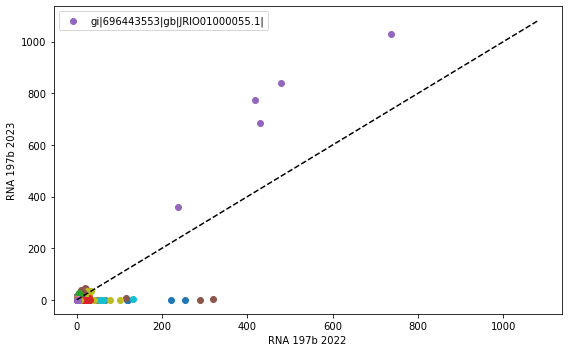

In [42]:
binsize = 100
fig, ax = plt.subplots(1, 1, figsize=(8, 5), facecolor='w', layout='tight')
for i, (k, v) in enumerate(rna2022_197b_for.items()):
    if i in [54]:  #, 344]:
        ax.scatter(utils.bin_values(v, binsize), utils.bin_values(rna2023_197b_for[k], binsize), label=k)
    else:
        ax.scatter(utils.bin_values(v, binsize), utils.bin_values(rna2023_197b_for[k], binsize))
ax.set_xlabel('RNA 197b 2022')
ax.set_ylabel('RNA 197b 2023')
maxlim = max(ax.get_xlim()[1], ax.get_ylim()[1])
ax.plot([0, maxlim], [0, maxlim], color='k', linestyle='--')
ax.legend(loc='upper left')

In [117]:
for k, v in TOTALS.items():
    if 'RNAseq' in k:
        print(k, v)

/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_167_replacement_sample_lib568677_7920_2_trimfiltered_reads_for.bw 5245914340.0
/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_167_replacement_sample_lib568677_7920_2_trimfiltered_reads_rev.bw 4353592504.0
/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_1_lib556538_7886_1_trimfiltered_reads_for.bw 4722792940.0
/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_1_lib556538_7886_1_trimfiltered_reads_rev.bw 3352264425.0
/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads_for.bw 4647335261.0
/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads_rev.bw 4410210487.0
/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_237_lib556540_7886_1_trimfiltered_reads_for.bw 5324442139.0
/home/alex/shared_folde

In [114]:
print(TOTALS['/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads_for.bw'])
print(TOTALS['/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads_for.bw'])


4647335261.0
1692090027.0


In [15]:
import re
r2020 = re.compile('[\S]*(167|1971|1972|237)[\S]*(.)(_trimfiltered[\S]*)$')
r2022 = re.compile('[\S]*(237[^_]*)_(.)[\S]*(_trimfiltered[\S]*)$')
r2023 = re.compile('[\S]*(167|197_1|197_2|237)_[^_]*_(.)[\S]*(_trimfiltered[\S]*)$')
rrna = re.compile('[\S]*(167|197_1|197_2|237[^_]*)[\S]*(_trimfiltered[\S]*)$')
r601 = re.compile('[\S]*(167|197|237)[\S]*(_max250[\S]*)$')
re_dict = {'MNases_06_2020': r2020,
           'MNase_03_2022': r2022,
           'MNase_08_2023': r2023,
           'RNAseq_03_2022': rrna,
           'RNAseq_08_2023': rrna,
           'MNase_601': r601}
# m = re.search(rrna, 'NG-29820_237sansD_lib587179_8045_2_paired')
# m.groups()

In [16]:
cov_dict = defaultdict(lambda: defaultdict(dict))
for filename, total in TOTALS.items():
    f = Path(filename)
    dirname = f.parent.name
    r = re_dict[dirname]
    grps = re.search(r, f.stem).groups()
    if dirname[:3] == 'RNA' or dirname == 'MNase_601':
        rid, suffix = grps
    else:
        rid, repl, suffix = grps
        rid = rid + '_' + repl
    if suffix.endswith('_max250_140-160'):
        suffix = 'v3_140-160'
    elif suffix.endswith('_max250_140-170'):
        suffix = 'v3_140-170'
    elif suffix.endswith('_for'):
        suffix = 'v3_for'
    elif suffix.endswith('_rev'):
        suffix = 'v3_rev'
    else:
        suffix = 'v3'
    cov_dict[dirname][rid][suffix] = int(total)
cov_dict

defaultdict(<function __main__.<lambda>()>,
            {'MNases_06_2020': defaultdict(dict,
                         {'167_2': {'v3': 3856948799,
                           'v3_140-160': 1012425067,
                           'v3_140-170': 1511082037},
                          '1971_1': {'v3': 5357863882,
                           'v3_140-160': 2250546318,
                           'v3_140-170': 3366227014},
                          '1972_1': {'v3': 5544761238,
                           'v3_140-160': 1594163132,
                           'v3_140-170': 2787284301},
                          '237_1': {'v3': 81164092,
                           'v3_140-160': 19846960,
                           'v3_140-170': 28439351},
                          '237_2': {'v3': 2816495438,
                           'v3_140-160': 668916893,
                           'v3_140-170': 963350051}}),
             'MNase_03_2022': defaultdict(dict,
                         {'237_1': {'v3': 3475413823,
    

In [17]:
print(list(cov_dict.keys()))

['MNases_06_2020', 'MNase_03_2022', 'MNase_08_2023', 'MNase_601', 'RNAseq_03_2022', 'RNAseq_08_2023']


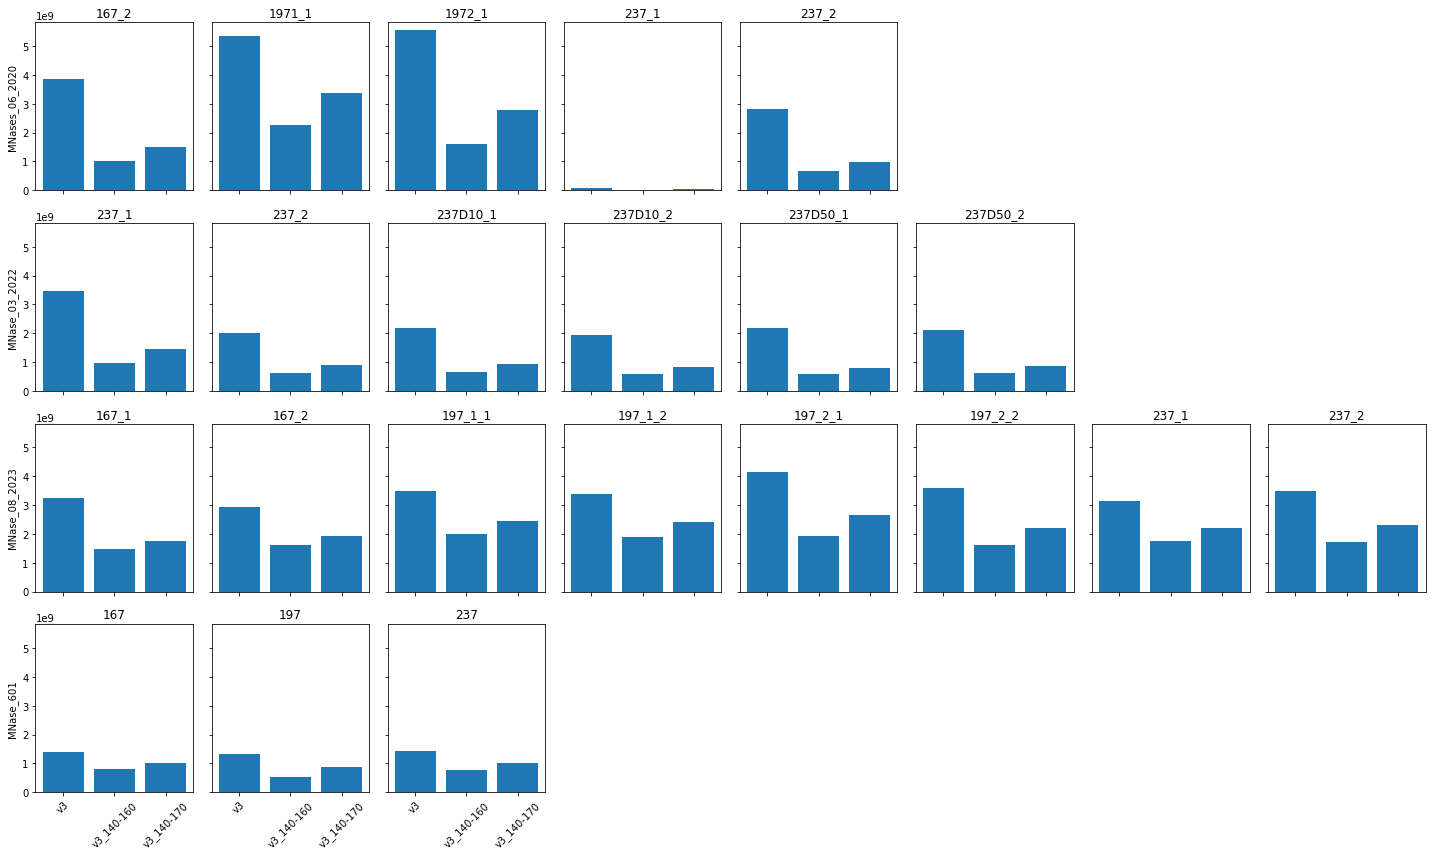

In [21]:
fig, axes = plt.subplots(4, 8, figsize=(20, 12), facecolor='w', layout='tight', sharey=True, sharex=True)
# fig, axes = plt.subplots(2, 6, figsize=(20, 7), facecolor='w', layout='tight', sharey=True, sharex=True)
for i, dirname in enumerate(cov_dict.keys()):
    if i >= 4:
        break
    # if not i >= 4:
    #     continue
    # i -= 4
    axes[i, 0].set_ylabel(dirname)
    for j, (f_key, f_cov_dict) in enumerate(cov_dict[dirname].items()):
        axes[i, j].bar(list(f_cov_dict.keys()), list(f_cov_dict.values()))
        axes[i, j].set_title(f_key)
        for tick in axes[i, j].get_xticklabels():
            tick.set_rotation(45)
    while j < axes.shape[1] - 1:
        j += 1
        axes[i, j].set_axis_off()

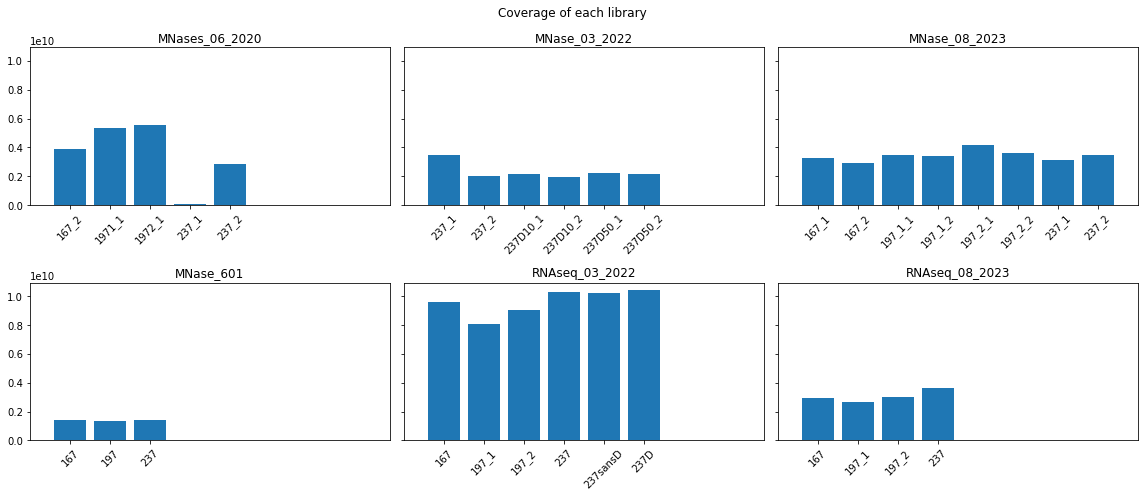

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(16, 7), facecolor='w', layout='tight', sharey=True)
fig.suptitle('Coverage of each library')
for ax, dirname in zip(axes.flatten(), cov_dict.keys()):
    ax.set_title(dirname)
    ax.bar(cov_dict[dirname].keys(), [d['v3'] for d in cov_dict[dirname].values()])
    ax.set_xlim((-1, 8))
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

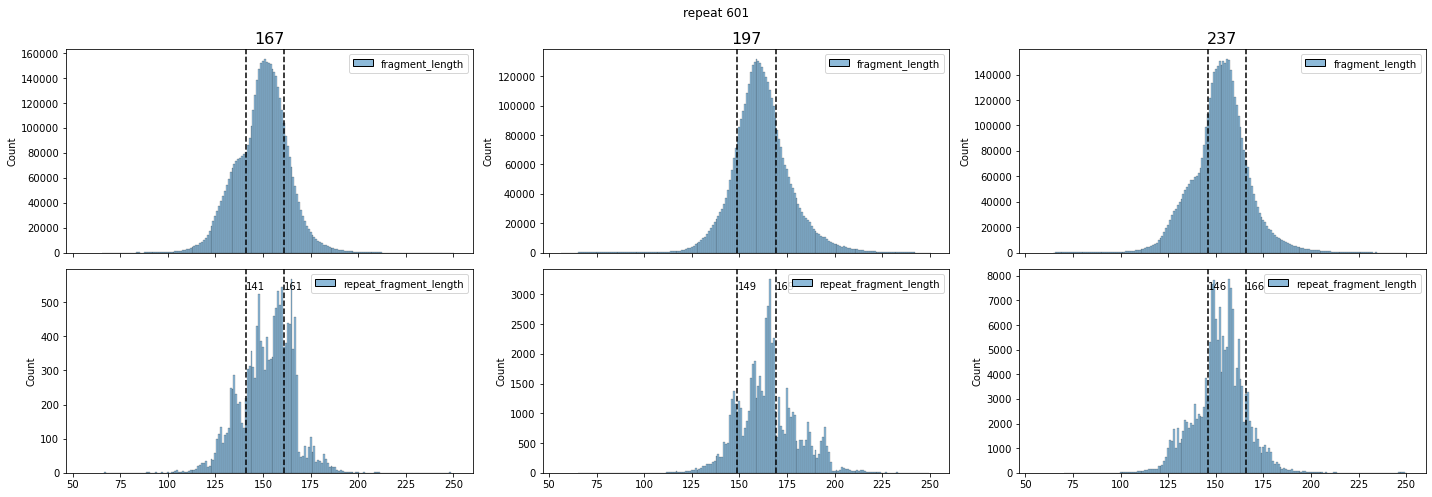

In [7]:
# file_list = ['MNase_03_2022/NG-29037_237_1_lib554809_7856_3_trimfiltered_max250',
#              'MNase_03_2022/NG-29037_237_2_lib554810_7856_3_trimfiltered_max250',
#              'MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_trimfiltered_max250',
#              'MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_trimfiltered_max250',
#              'MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_trimfiltered_max250',
#              'MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_trimfiltered_max250']
# titles = ['noD_1', 'noD_2', 'D10_1', 'D10_2', 'D50_1', 'D50_2']
# fig, axes = plt.subplots(6, 2, sharex=True, figsize=(12, 12), facecolor='w', layout='tight')
file_list = ['MNase_601/SRR13645559_167_max250',
             'MNase_601/SRR13645549_197_max250',
             'MNase_601/SRR13645545_237_max250']
titles = ['167', '197', '237']
fig, axes = plt.subplots(2, len(file_list), sharex=True, figsize=(20, 7), facecolor='w', layout='tight')
fig.suptitle('repeat 601')
offsetlines = [-10, +10] # [] #
for i, filename in enumerate(file_list):
    ix, iy = 0, i # divmod(i, 2) #
    fraglens = pd.read_csv(f'/home/alex/shared_folder/JB_seqdes/Projet_Julien/{filename}.sorted.bam.insert_sizes.txt', header=None)
    repfraglens = pd.read_csv(f'/home/alex/shared_folder/JB_seqdes/Projet_Julien/{filename}.sorted.bam.repeat_insert_sizes.txt', header=None)
    fraglens.columns = ['fragment_length']
    repfraglens.columns = ['repeat_fragment_length']
    sns.histplot(fraglens, discrete=True, ax=axes[0 + 2*ix, iy])
    g = sns.histplot(repfraglens, discrete=True, ax=axes[1 + 2*ix, iy])
    # print(np.median(fraglens))
    val, count = np.unique(fraglens, return_counts=True)
    max_val = val[np.argmax(count)]
    vlines = [max_val + v for v in offsetlines]
    for v in vlines:
        axes[0 + ix*2, iy].axvline(x=v, color='k', linestyle='--')
        axes[1 + ix*2, iy].axvline(x=v, color='k', linestyle='--')
        axes[1 + ix*2, iy].annotate(str(v), xy=(v, 0.9), xycoords=('data', 'axes fraction'))
    axes[0 + ix*2, iy].set_title(titles[i], fontsize=16)

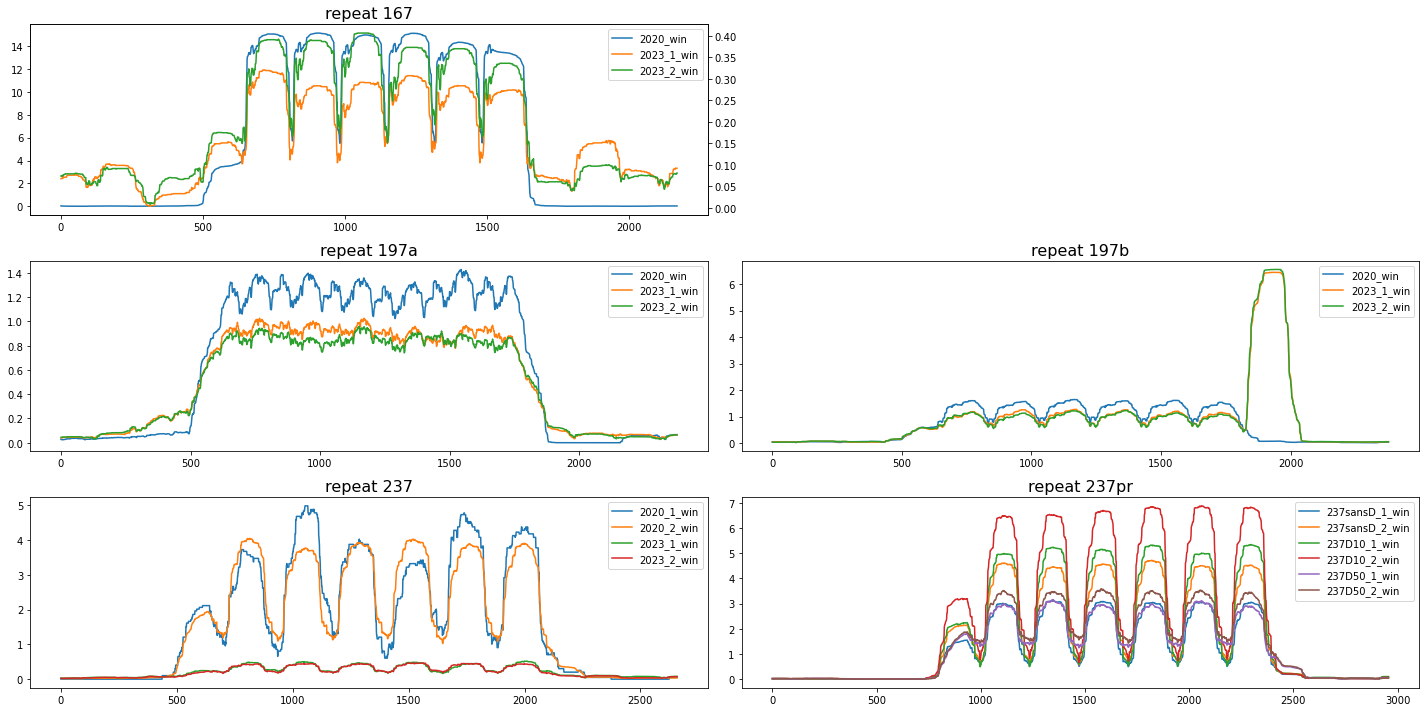

In [46]:
start = 3500
stop = -3500

fig, axes = plt.subplots(3, 2, figsize=(20, 10), facecolor='w', layout='tight')

axes[0, 0].set_title('repeat 167', fontsize=16)
col_idx = 0
axes[0, 0].plot(mnase2020_167_win['167_7_4kbrf'][start:stop], label='2020_win') ; col_idx += 1
ax0 = axes[0, 0].twinx()
ax0.plot(mnase2023_167_1_win['167_7_4kbrf'][start:stop], label='2023_1_win', color=colors[col_idx]) ; col_idx += 1
ax0.plot(mnase2023_167_2_win['167_7_4kbrf'][start:stop], label='2023_2_win', color=colors[col_idx]) ; col_idx += 1
h, l = plot_utils.add_legend([axes[0, 0], ax0])
axes[0, 0].legend(h, l)

axes[0, 1].set_axis_off()

axes[1, 0].set_title('repeat 197a', fontsize=16)
axes[1, 0].plot(mnase2020_197a_win['197a_7_4kbrf'][start:stop], label='2020_win')
axes[1, 0].plot(mnase2023_197a_1_win['197a_7_4kbrf'][start:stop], label='2023_1_win')
axes[1, 0].plot(mnase2023_197a_2_win['197a_7_4kbrf'][start:stop], label='2023_2_win')
axes[1, 0].legend()

axes[1, 1].set_title('repeat 197b', fontsize=16)
axes[1, 1].plot(mnase2020_197b_win['197b_7_4kbrf'][start:stop], label='2020_win')
axes[1, 1].plot(mnase2023_197b_1_win['197b_7_4kbrf'][start:stop], label='2023_1_win')
axes[1, 1].plot(mnase2023_197b_2_win['197b_7_4kbrf'][start:stop], label='2023_2_win')
axes[1, 1].legend()

axes[2, 0].set_title('repeat 237', fontsize=16)
axes[2, 0].plot(mnase2020_237_1_win['237_7_4kbrf'][start:stop], label='2020_1_win')
axes[2, 0].plot(mnase2020_237_2_win['237_7_4kbrf'][start:stop], label='2020_2_win')
axes[2, 0].plot(mnase2023_237_1_win['237_7_4kbrf'][start:stop], label='2023_1_win')
axes[2, 0].plot(mnase2023_237_2_win['237_7_4kbrf'][start:stop], label='2023_2_win')
axes[2, 0].legend()

axes[2, 1].set_title('repeat 237pr', fontsize=16)
axes[2, 1].plot(mnase2022_237sansD_1_win['237pr_7_4kbrf'][start:stop], label='237sansD_1_win')
axes[2, 1].plot(mnase2022_237sansD_2_win['237pr_7_4kbrf'][start:stop], label='237sansD_2_win')
axes[2, 1].plot(mnase2022_237D10_1_win['237pr_7_4kbrf'][start:stop], label='237D10_1_win')
axes[2, 1].plot(mnase2022_237D10_2_win['237pr_7_4kbrf'][start:stop], label='237D10_2_win')
axes[2, 1].plot(mnase2022_237D50_1_win['237pr_7_4kbrf'][start:stop], label='237D50_1_win')
axes[2, 1].plot(mnase2022_237D50_2_win['237pr_7_4kbrf'][start:stop], label='237D50_2_win')
axes[2, 1].legend()

/home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX.png exists, changing filename to /home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX(1).png
/home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX.svg exists, changing filename to /home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX(1).svg
/home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX.pickle exists, changing filename to /home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX(1).pickle


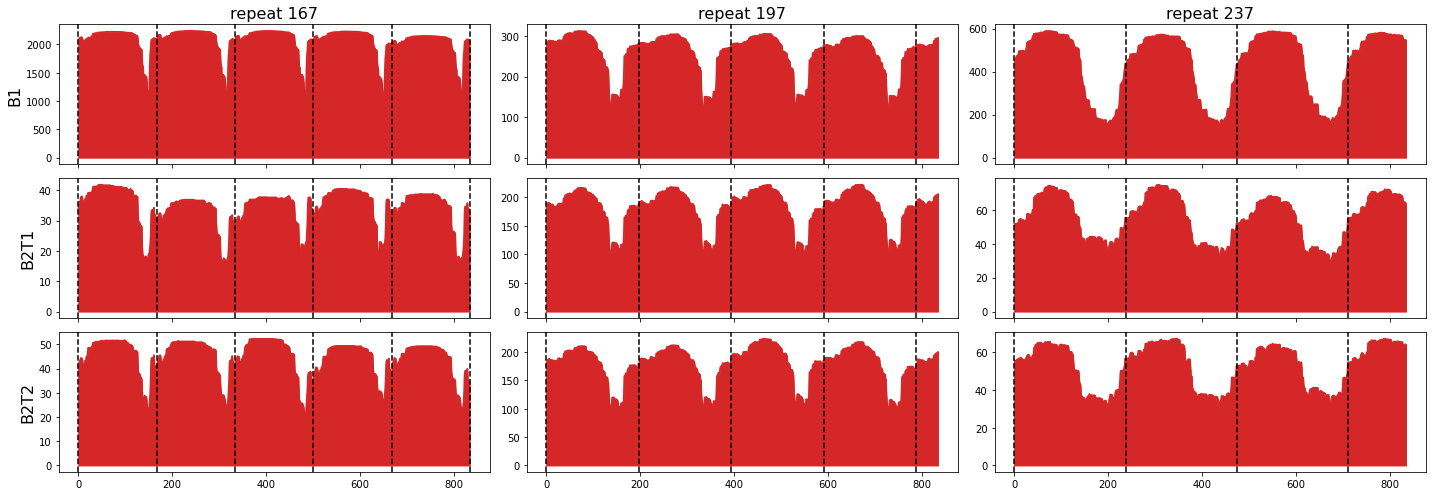

In [9]:
start = 4000
rstart = 4000
signals = np.array([[mnase2020_167_win3, mnase2020_197b_win3, mnase2020_237_2_win3],
                    [mnase2023_167_1_win3, mnase2023_197b_1_win3, mnase2023_237_1_win3],
                    [mnase2023_167_2_win3, mnase2023_197b_2_win3, mnase2023_237_2_win3]])
ylabels = ['B1', 'B2T1', 'B2T2']
repeats = ['167', '197b', '237']
fig, axes = plt.subplots(3, 3, figsize=(20, 7), facecolor='w', layout='tight', sharex='col')#, sharey='col')

for j in range(3):
    axes[0, j].set_title(f'repeat {repeats[j][:3]}', fontsize=16)
for i in range(3):
    axes[i, 0].set_ylabel(ylabels[i], fontsize=16)
    for j in range(3):
        ax = axes[i, j]
        signal = signals[i, j]
        rid = repeats[j]
        rlen = int(rid[:3])
        # stop = rstart + 7*rlen + (4000-start)
        # ax.plot(np.arange(start, stop), signal[f'{rid}_7_4kbrf'][start:stop], color=colors[3])
        # ax.fill_between(np.arange(start, stop), signal[f'{rid}_7_4kbrf'][start:stop], color=colors[3])
        # for reps in range(0, 8):
        #     ax.axvline(rstart + reps*rlen, color='k', linestyle='--')
        start = rstart + rlen
        stop = start + 5*167
        ax.plot(signal[f'{rid}_7_4kbrf'][start:stop], color=colors[3])
        ax.fill_between(np.arange(stop-start), signal[f'{rid}_7_4kbrf'][start:stop], color=colors[3])
        for reps in range(0, 6-j):
            ax.axvline(reps*rlen, color='k', linestyle='--')
plot_utils.save_fig_and_values(fig, '/home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX', format=['png', 'svg'])

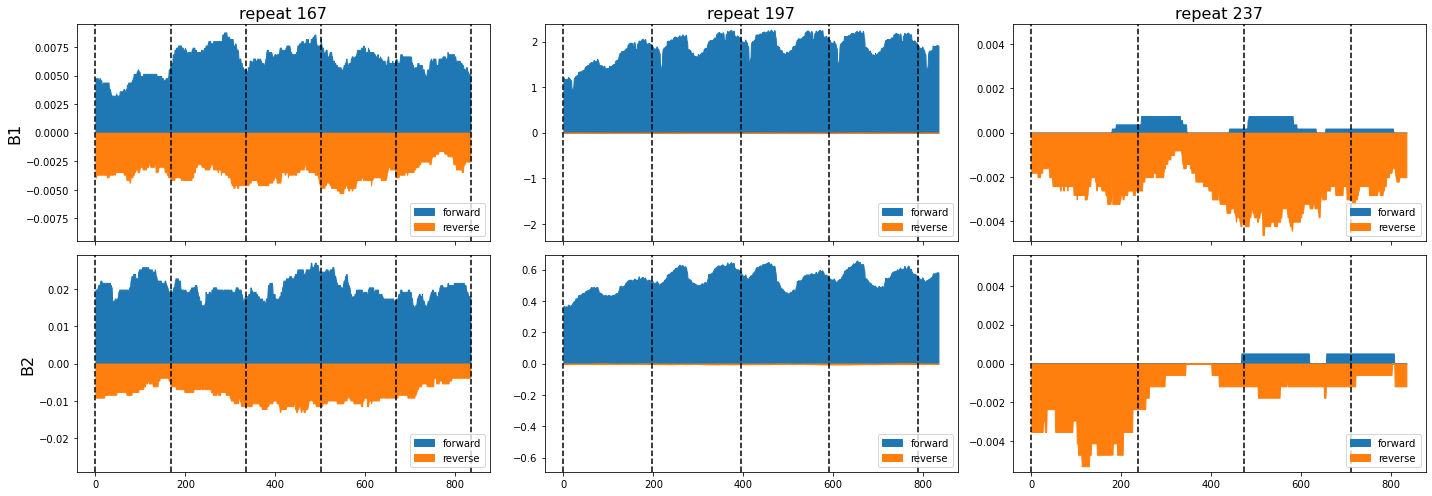

In [86]:
rstart = 4000
signals = np.array([[[rna2022_167_for, rna2022_167_rev],
                     [rna2022_197b_for, rna2022_197b_rev],
                     [rna2022_237_for, rna2022_237_rev]],

                    [[rna2023_167_for, rna2023_167_rev],
                     [rna2023_197b_for, rna2023_197b_rev],
                     [rna2023_237_for, rna2023_237_rev]]])
ylabels = ['B1', 'B2']
repeats = ['167', '197b', '237']
fig, axes = plt.subplots(2, 3, figsize=(20, 7), facecolor='w', layout='tight', sharex=True, sharey=False)

for j in range(3):
    axes[0, j].set_title(f'repeat {repeats[j][:3]}', fontsize=16)
for i in range(2):
    axes[i, 0].set_ylabel(ylabels[i], fontsize=16)
    for j in range(3):
        ax = axes[i, j]
        signal_for = signals[i, j, 0]
        signal_rev = signals[i, j, 1]
        rid = repeats[j]
        rlen = int(rid[:3])
        start = rstart + rlen
        stop = start + 5*167
        ax.fill_between(np.arange(stop-start), signal_for[f'{rid}_7_4kbrf'][start:stop], color=colors[0], label='forward')
        ax.fill_between(np.arange(stop-start), -signal_rev[f'{rid}_7_4kbrf'][start:stop], color=colors[1], label='reverse')
        for reps in range(0, 6-j):
            ax.axvline(reps*rlen, color='k', linestyle='--')
        ax.legend(loc='lower right')
        maxylim = max(abs(i) for i in ax.get_ylim())
        ax.set_ylim(-maxylim, maxylim)
# for ax in axes[0, :1]:
#     maxylim = max(abs(i) for i in ax.get_ylim()) / 20
#     ax.set_ylim(-maxylim, maxylim)
# plot_utils.save_fig_and_values(fig, '/home/alex/shared_folder/JB_seqdes/results/mnase_Syn_comparereps_140-170_noedges_sameX', format=['png', 'svg'])

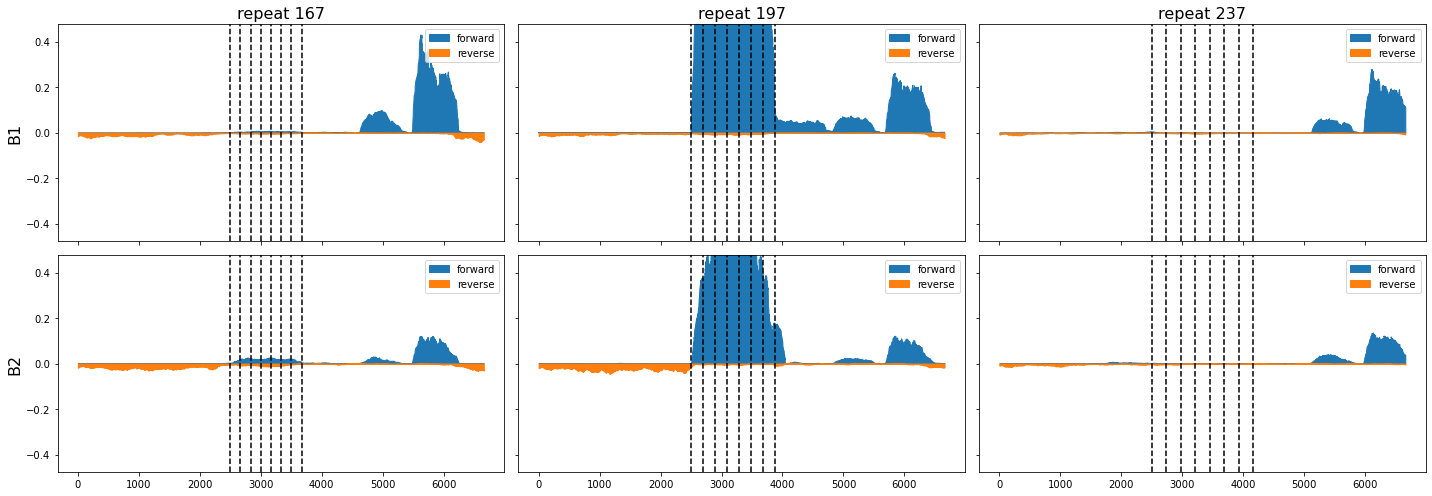

In [89]:
edge = 2500
start = 4000-edge
stop = 4000 + 7*237 + edge
signals = np.array([[[rna2022_167_for, rna2022_167_rev],
                     [rna2022_197b_for, rna2022_197b_rev],
                     [rna2022_237_for, rna2022_237_rev]],

                    [[rna2023_167_for, rna2023_167_rev],
                     [rna2023_197b_for, rna2023_197b_rev],
                     [rna2023_237_for, rna2023_237_rev]]])
ylabels = ['B1', 'B2']
repeats = ['167', '197b', '237']
fig, axes = plt.subplots(2, 3, figsize=(20, 7), facecolor='w', layout='tight', sharex=True, sharey=True)

for j in range(3):
    axes[0, j].set_title(f'repeat {repeats[j][:3]}', fontsize=16)
for i in range(2):
    axes[i, 0].set_ylabel(ylabels[i], fontsize=16)
    for j in range(3):
        ax = axes[i, j]
        signal_for = signals[i, j, 0]
        signal_rev = signals[i, j, 1]
        rid = repeats[j]
        rlen = int(rid[:3])
        ax.fill_between(np.arange(stop-start), signal_for[f'{rid}_7_4kbrf'][start:stop], color=colors[0], label='forward')
        ax.fill_between(np.arange(stop-start), -signal_rev[f'{rid}_7_4kbrf'][start:stop], color=colors[1], label='reverse')
        for reps in range(0, 8):
            ax.axvline(edge+reps*rlen, color='k', linestyle='--')
        ax.legend()
        # maxylim = max(abs(i) for i in ax.get_ylim())
        # ax.set_ylim(-maxylim, maxylim)
for ax in axes[0, :1]:
    maxylim = max(abs(i) for i in ax.get_ylim()) / 5
    ax.set_ylim(-maxylim, maxylim)

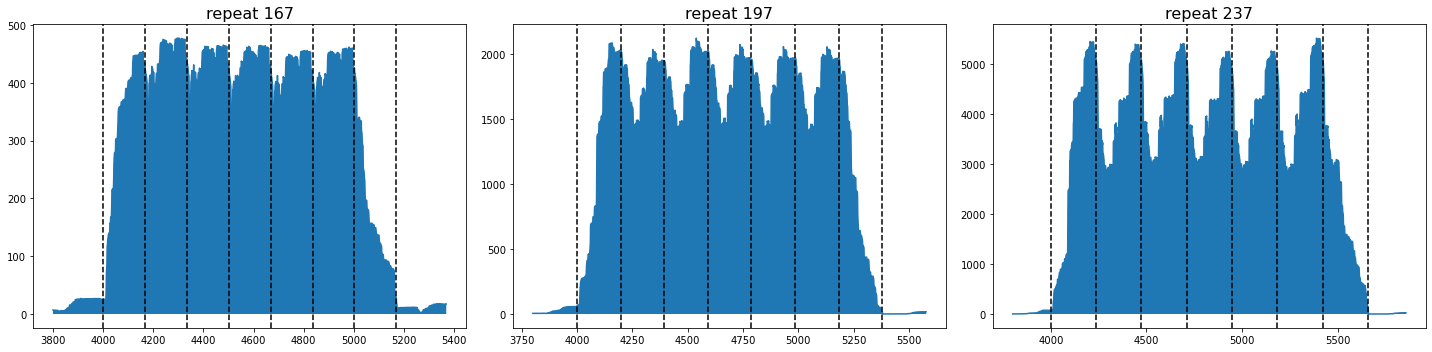

In [10]:
start = 3800
rstart = 4000
signals = np.array([mnase601_167_win3, mnase601_197_win3, mnase601_237_win3])
repeats = ['167', '197', '237']
fig, axes = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', layout='tight', sharex='col', sharey='col')

for j in range(3):
    axes[j].set_title(f'repeat {repeats[j]}', fontsize=16)
    ax = axes[j]
    signal = signals[j]
    rid = repeats[j]
    rlen = int(rid[:3])
    stop = rstart + rlen * 7 + (4000-start)
    ax.plot(np.arange(start, stop), signal[f'{rid}_601_7_4kbrf'][start:stop])
    ax.fill_between(np.arange(start, stop), signal[f'{rid}_601_7_4kbrf'][start:stop])
    # ax.plot(np.arange(rstart, rstop), signal[f'{rid}_7_4kbrf'][rstart:rstop])
    # ax.fill_between(np.arange(rstart, rstop), signal[f'{rid}_7_4kbrf'][rstart:rstop], label='repeat', color=colors[1])
    for reps in range(0, 8):
        ax.axvline(rstart + reps*rlen, color='k', linestyle='--')

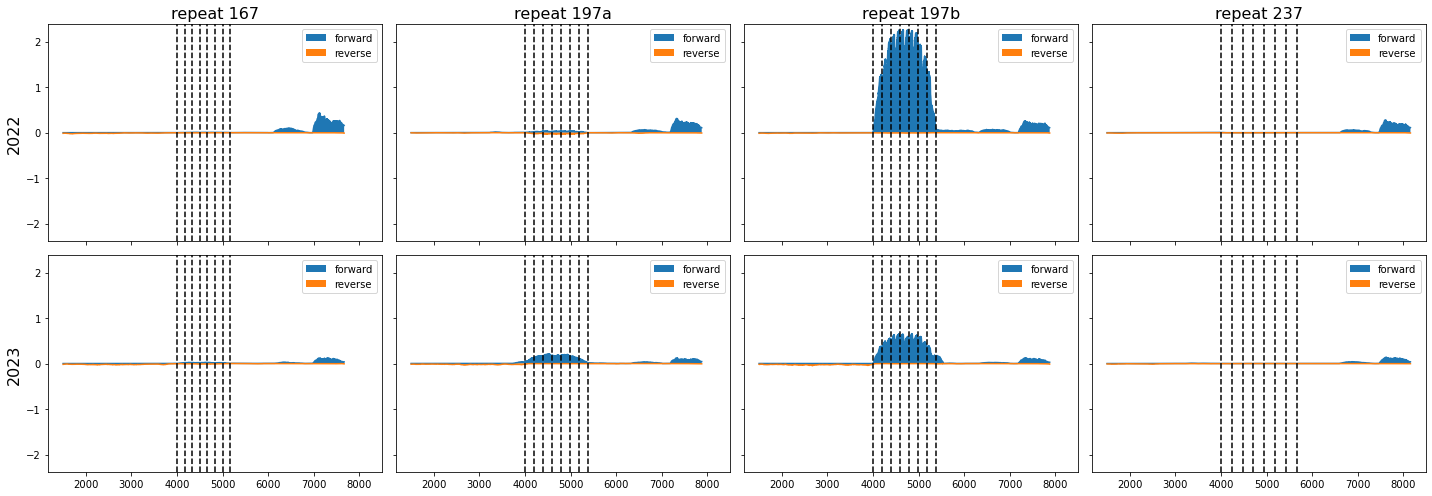

In [67]:
start = 1500
rstart = 4000
signals = np.array([[(rna2022_167_for, rna2022_167_rev), (rna2022_197a_for, rna2022_197a_rev), (rna2022_197b_for, rna2022_197b_rev), (rna2022_237_for, rna2022_237_rev)],
                    [(rna2023_167_for, rna2023_167_rev), (rna2023_197a_for, rna2023_197a_rev), (rna2023_197b_for, rna2023_197b_rev), (rna2023_237_for, rna2023_237_rev)]])
labels = ['2022', '2023']
repeats = ['167', '197a', '197b', '237']
fig, axes = plt.subplots(2, 4, figsize=(20, 7), facecolor='w', layout='tight', sharex=True, sharey=True)

for j in range(4):
    axes[0, j].set_title(f'repeat {repeats[j]}', fontsize=16)
for i in range(2):
    axes[i, 0].set_ylabel(labels[i], fontsize=16)
    for j in range(4):
        ax = axes[i, j]
        signal_for, signal_rev = signals[i, j]
        rid = repeats[j]
        rlen = int(rid[:3])
        stop = rstart + rlen * 7 + (4000-start)
        if signal_for is not None:
            ax.plot(np.arange(start, stop), signal_for[f'{rid}_7_4kbrf'][start:stop])
            ax.fill_between(np.arange(start, stop), signal_for[f'{rid}_7_4kbrf'][start:stop], label='forward')
            ax.plot(np.arange(start, stop), -signal_rev[f'{rid}_7_4kbrf'][start:stop])
            ax.fill_between(np.arange(start, stop), -signal_rev[f'{rid}_7_4kbrf'][start:stop], label='reverse')
            # ax.plot(np.arange(rstart, rstop), signal_for[f'{rid}_7_4kbrf'][rstart:rstop])
            # ax.fill_between(np.arange(rstart, rstop), signal_for[f'{rid}_7_4kbrf'][rstart:rstop], label='repeat', color=colors[1])
            for reps in range(0, 8):
                ax.axvline(rstart + reps*rlen, color='k', linestyle='--')
            ax.legend()
        else:
            ax.set_axis_off()
for ax in axes[0, :1]:
    maxylim = max(abs(i) for i in ax.get_ylim())
    ax.set_ylim(-maxylim, maxylim)

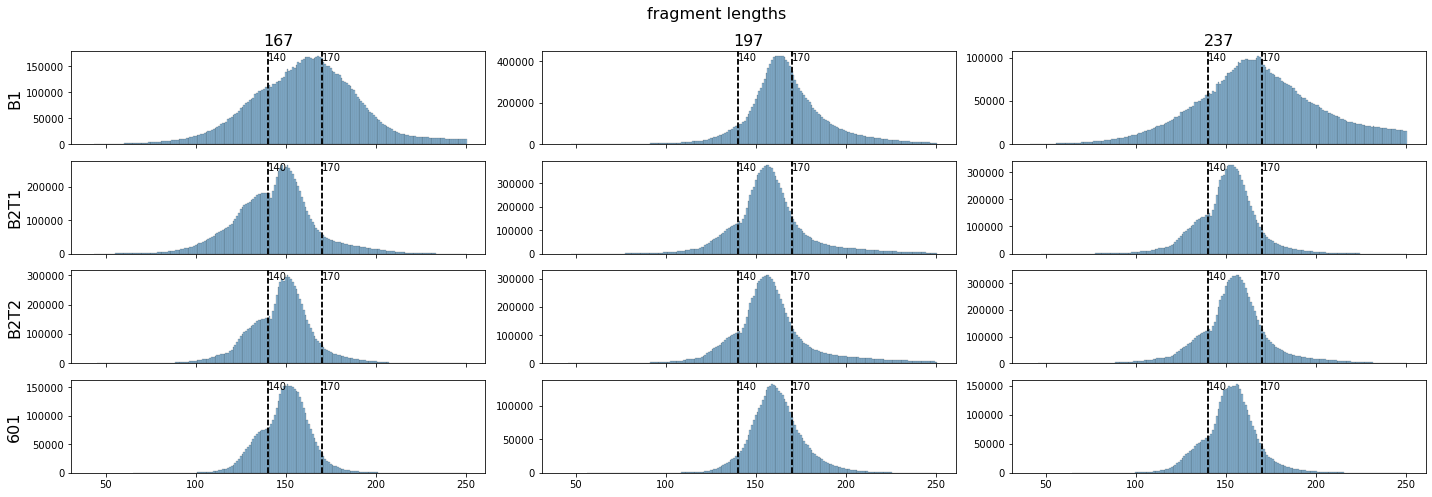

In [44]:
bam_files = [
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250.sorted.bam',
    ]
titles = ['167', '197', '237']
ylabels = ['B1', 'B2T1', 'B2T2', '601']
fig, axes = plt.subplots(4, 3, figsize=(20, 7), facecolor='w', layout='tight', sharex=True)
fig.suptitle('fragment lengths', fontsize=16)
vlines = [140, 170]
for filename, ax in zip(bam_files, axes.flatten()):
    fraglens = pd.read_csv(f'{filename}.insert_sizes.txt', header=None)
    fraglens.columns = ['fragment_length']
    sns.histplot(fraglens, discrete=True, ax=ax, legend=False)
    ax.set_ylabel(None)
    for v in vlines:
        ax.axvline(x=v, color='k', linestyle='--')
        ax.axvline(x=v, color='k', linestyle='--')
        ax.annotate(str(v), xy=(v, 0.9), xycoords=('data', 'axes fraction'))
for j in range(3):
    axes[0, j].set_title(titles[j], fontsize=16)
for i in range(4):
    axes[i, 0].set_ylabel(ylabels[i], fontsize=16)
plot_utils.save_fig_and_values(fig, '/home/alex/shared_folder/JB_seqdes/results/fraglens_Synrepsand601_140-170', format=['png', 'svg'])

4930 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250.sorted.bam
3981 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.sorted.bam
2516 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250.sorted.bam
94 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250.sorted.bam
2507 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.sorted.bam
1094 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.sorted.bam
120 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250.sorted.bam
2129 /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_202

Text(0.5, 0.98, 'Mid points of fragments between 140 and 170bp')

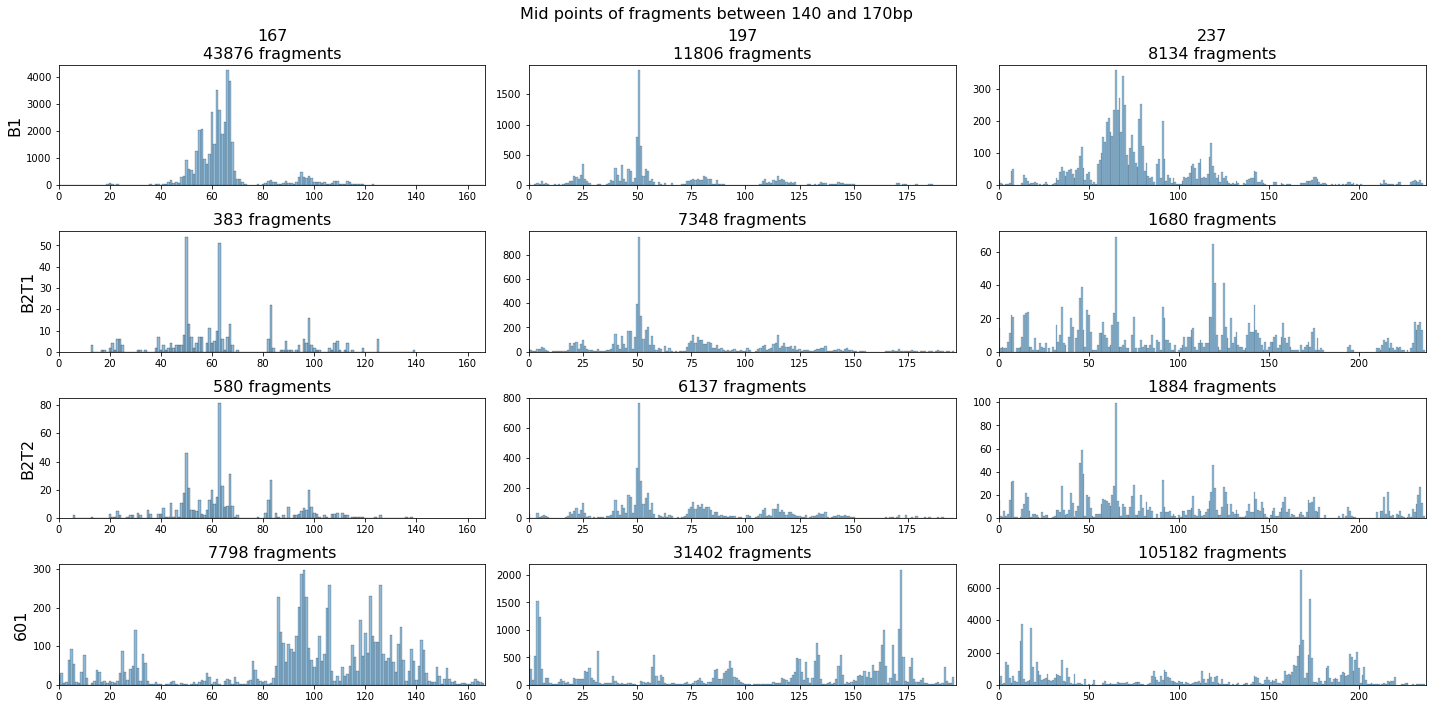

In [70]:
bam_files = [
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250.sorted.bam',

    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_trimfiltered_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250.sorted.bam',
    ]
titles = ['167', '197', '237'] + [''] * 9
ylabels = ['B1', 'B2T1', 'B2T2', '601']
repids = ['167', '197b', '237'] * 3 + ['167_601', '197_601', '237_601']
minfragsize, maxfragsize = 140, 170
start = 4000
fig, axes = plt.subplots(4, 3, figsize=(20, 10), facecolor='w', layout='tight')
for bam_file, title, repid, ax in zip(bam_files, titles, repids, axes.flatten()):
    rlen = int(repid[:3])
    with pysam.AlignmentFile(bam_file, 'rb') as f:
        coords = []
        for read in f.fetch(contig=f'{repid}_7_4kbrf'):
            if (not read.is_reverse
                and read.is_proper_pair
                and read.template_length >= minfragsize
                and read.template_length <= maxfragsize
                and read.reference_start >= start
                and read.reference_start + read.template_length < start + 7*rlen):
                coords.append(read.reference_start + read.template_length // 2)
    coords = np.array(coords)
    rep_coords = (coords[(coords >= start+rlen) & (coords < start + 6*rlen)] - start) % rlen
    print(len(rep_coords[(rep_coords >= 90) | (rep_coords < 30)]), bam_file)
    sns.histplot(pd.DataFrame(rep_coords, columns=['mid points']), discrete=True, ax=ax, legend=False)
    ax.set_ylabel(None)
    if title != '':
        ax.set_title(f'{title}\n{len(rep_coords)} fragments', fontsize=16)
    else:
        ax.set_title(f'{len(rep_coords)} fragments', fontsize=16)
    ax.set_xlim(0, rlen)
for i in range(4):
    axes[i, 0].set_ylabel(ylabels[i], fontsize=16)
fig.suptitle(f'Mid points of fragments between {minfragsize} and {maxfragsize}bp', fontsize=16)
# plot_utils.save_fig_and_values(fig, '/home/alex/shared_folder/JB_seqdes/results/midpoints_Synrepsand601_140-170_noedges', format=['png'])

Text(0.5, 0.98, 'Midpoints of fragments between 140 and 170bp extended 73 bases each direction')

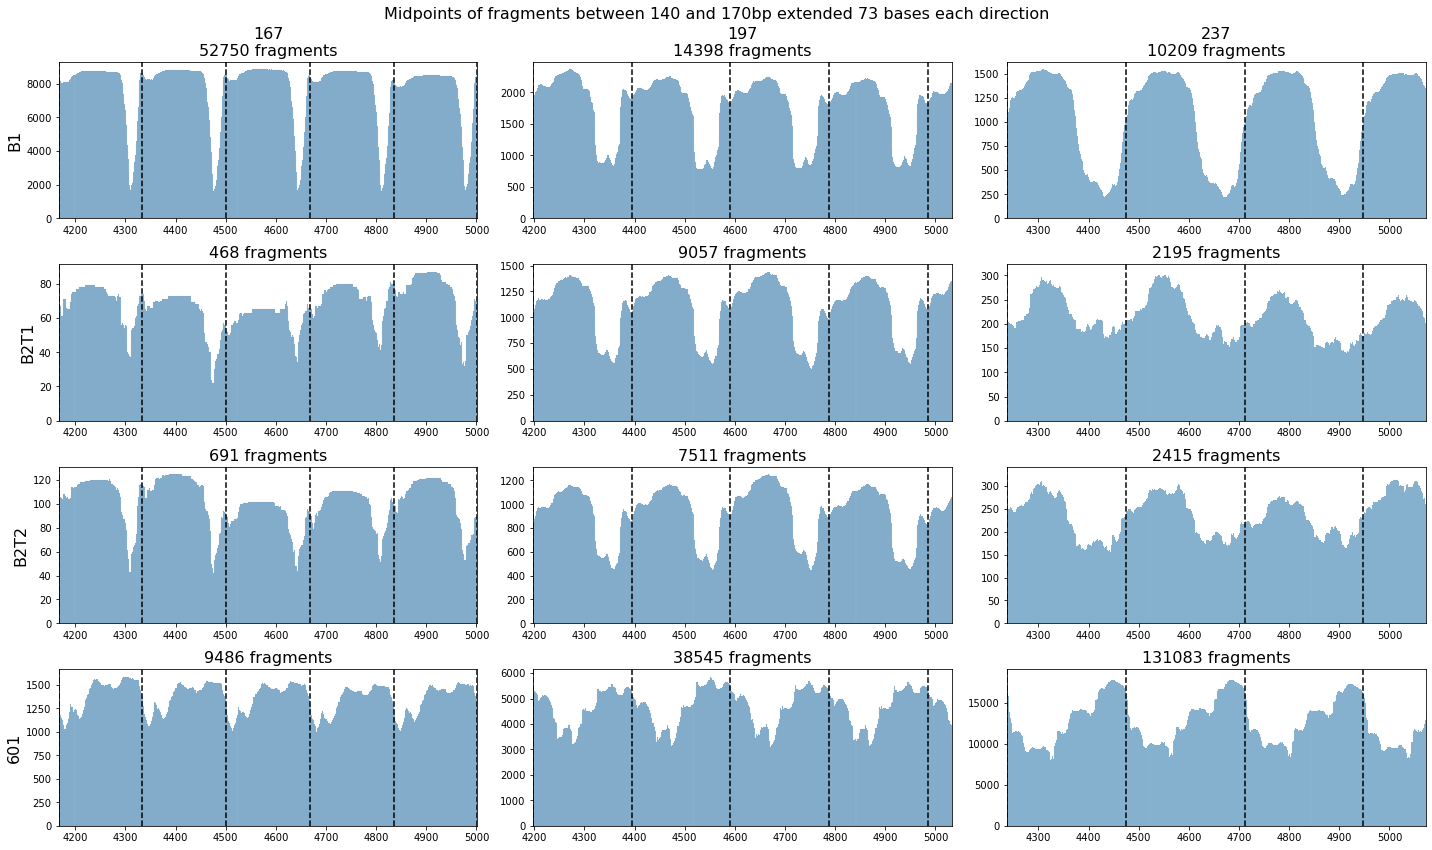

In [65]:
bam_files = [
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250.sorted.bam',
    ]
titles = ['167', '197', '237'] + [''] * 9
ylabels = ['B1', 'B2T1', 'B2T2', '601']
repids = ['167', '197b', '237'] * 3 + ['167_601', '197_601', '237_601']
minfragsize, maxfragsize = 140, 170
ext_len = 73
start = 4000
fig, axes = plt.subplots(4, 3, figsize=(20, 12), facecolor='w', layout='tight')
for bam_file, title, repid, ax in zip(bam_files, titles, repids, axes.flatten()):
    rlen = int(repid[:3])
    with pysam.AlignmentFile(bam_file, 'rb') as f:
        coords = []
        for read in f.fetch(contig=f'{repid}_7_4kbrf'):
            if (not read.is_reverse
                and read.is_proper_pair
                and read.template_length >= minfragsize
                and read.template_length <= maxfragsize
                and read.reference_start >= start
                and read.reference_start + read.template_length < start + 7*rlen):
                coords.append(read.reference_start + read.template_length // 2)
    coords = np.array(coords)
    # rep_coords = (coords[(coords >= start+rlen) & (coords < start + 6*rlen)] - start) % rlen
    extended_coords = (coords.reshape(-1, 1) + np.arange(-ext_len, ext_len + 1).reshape(1, -1)).ravel()# % rlen

    sns.histplot(pd.DataFrame(extended_coords, columns=['mid points']), discrete=True, ax=ax, legend=False)
    ax.set_ylabel(None)
    if title != '':
        ax.set_title(f'{title}\n{len(coords)} fragments', fontsize=16)
    else:
        ax.set_title(f'{len(coords)} fragments', fontsize=16)
    for i in range(1, 7 - (rlen-167)//30):
        ax.axvline(start + i*rlen, color='k', linestyle='--')
    ax.set_xlim(start + rlen, start + rlen + 5*167)
for i in range(4):
    axes[i, 0].set_ylabel(ylabels[i], fontsize=16)
fig.suptitle(f'Midpoints of fragments between {minfragsize} and {maxfragsize}bp extended {ext_len} bases each direction', fontsize=16)

Text(0.5, 0.98, 'Mid points of fragments between 140 and 170bp')

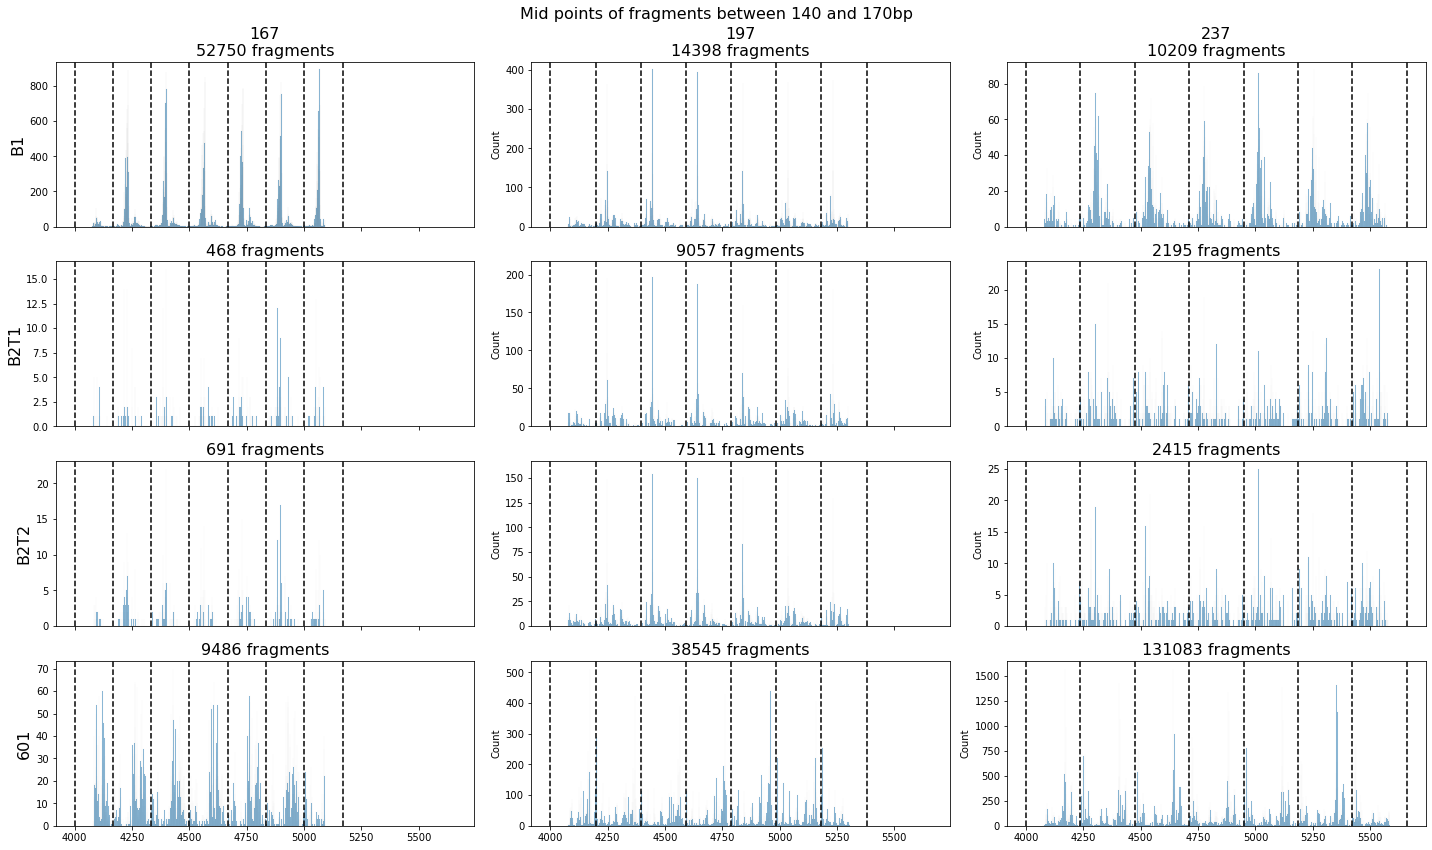

In [37]:
bam_files = [
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250.sorted.bam',

    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645559_167_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645549_197_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_601/SRR13645545_237_max250.sorted.bam',
    ]
titles = ['167', '197', '237'] + [''] * 9
ylabels = ['B1', 'B2T1', 'B2T2', '601']
repids = ['167', '197b', '237'] * 3 + ['167_601', '197_601', '237_601']
minfragsize, maxfragsize = 140, 170
start = 4000
fig, axes = plt.subplots(4, 3, figsize=(20, 12), facecolor='w', layout='tight', sharex=True)
for bam_file, title, repid, ax in zip(bam_files, titles, repids, axes.flatten()):
    rlen = int(repid[:3])
    with pysam.AlignmentFile(bam_file, 'rb') as f:
        coords = []
        for read in f.fetch(contig=f'{repid}_7_4kbrf'):
            if (not read.is_reverse
                and read.is_proper_pair
                and read.template_length >= minfragsize
                and read.template_length <= maxfragsize
                # and ((read.reference_start < start
                #       and read.reference_start + read.template_length >= start)
                #      or (read.reference_start < start + 7*rlen
                #          and read.reference_start + read.template_length >= start + 7*rlen))
                # and read.reference_start + read.template_length >= start
                # and read.reference_start < start + 7*rlen
                and read.reference_start >= start
                and read.reference_start + read.template_length < start + 7*rlen
                ):
                coords.append(read.reference_start + read.template_length // 2)
    coords = np.array(coords)
    # rep_coords = (coords[(coords >= start+rlen) & (coords < start + 6*rlen)] - start) % rlen

    sns.histplot(pd.DataFrame(coords, columns=['mid points']), discrete=True, ax=ax, legend=False)
    if title != '':
        ax.set_title(f'{title}\n{len(coords)} fragments', fontsize=16)
    else:
        ax.set_title(f'{len(coords)} fragments', fontsize=16)
    for i in range(8):
        ax.axvline(start + i*rlen, color='k', linestyle='--')
for i in range(4):
    axes[i, 0].set_ylabel(ylabels[i], fontsize=16)
fig.suptitle(f'Mid points of fragments between {minfragsize} and {maxfragsize}bp', fontsize=16)

Figure article

In [7]:
model_name = 'weights_with_rev_compl_rep2'
with np.load(f'/home/alex/shared_folder/JB_seqdes/results/preds_{model_name}_on_justrepeatsATGC.npz') as f:
    preds_syn = {k: f[k] for k in f.keys()}
with np.load(f'/home/alex/shared_folder/JB_seqdes/results/preds_{model_name}_on_justrepeats601ATGC.npz') as f:
    preds_601 = {k: f[k] for k in f.keys()}

In [8]:
def target(n_reps, replen, final_len=None):
    amp = 0.4
    background = 0.2
    nuclen = 147

    x_gauss = np.arange(1, nuclen)
    y_target_ = background + amp*np.exp(-((x_gauss-((nuclen-1)/2.))**2 / (2.*nuclen*nuclen/16.)))
    y_target_ = np.append(y_target_, np.repeat(y_target_[-1],(replen - (nuclen-1))))  # linkers at last value
    y_target = np.tile(y_target_, n_reps)
    if final_len is not None:
        y_target = y_target[:final_len]
    return y_target

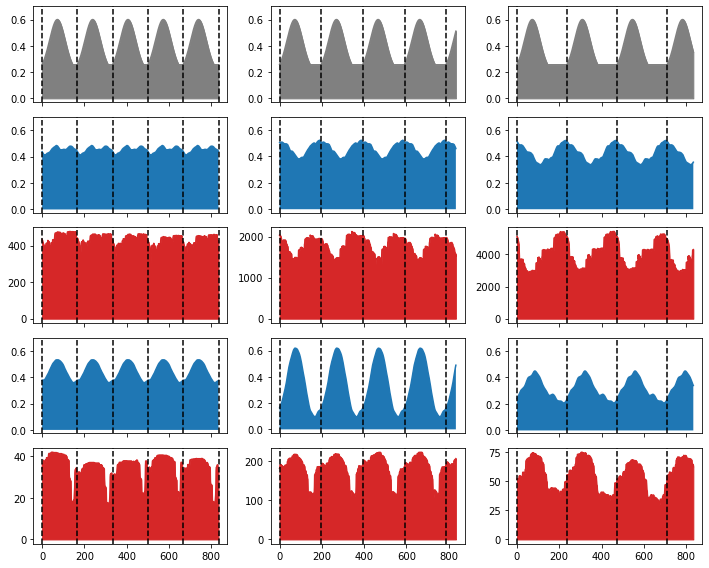

In [14]:
fig, axes = plt.subplots(5, 3, figsize=(10, 8), facecolor='w', layout='tight', sharex=True)

n_reps = 5
signals_601 = [mnase601_167_win3, mnase601_197_win3, mnase601_237_win3]
repeats_601 = ['167_601', '197_601', '237_601']
signals_syn = [mnase2023_167_1_win3, mnase2023_197b_1_win3, mnase2023_237_1_win3]
repeats_syn = ['167', '197b', '237']
ylabels = ['target', 'pred.', 'exp.', 'pred.', 'exp.']

for j in range(3):
    rid = repeats_601[j]
    rlen = int(rid[:3])
    # axes[0, j].set_title(f'repeat {rlen}', fontsize=24)

    # target
    targ = target(n_reps, rlen, 167*n_reps)
    axes[0, j].plot(targ, color='grey')
    axes[0, j].fill_between(np.arange(len(targ)), targ, color='grey')

    # 601 pred
    pred = preds_601[rid]
    start = 1000
    stop = start + n_reps*167
    values = utils.moving_average(pred[start-4:stop+3], 8)
    axes[1, j].plot(values)
    axes[1, j].fill_between(np.arange(stop-start), values)
    # 601 signal
    signal = signals_601[j]
    start = 4000 + rlen
    stop = start + n_reps*167
    values = signal[f'{rid}_7_4kbrf'][start:stop]
    axes[2, j].plot(values, color=colors[3])
    axes[2, j].fill_between(np.arange(stop-start), values, color=colors[3])
    
    # syn pred
    rid = repeats_syn[j]
    pred = preds_syn[rid]
    start = 1000
    stop = start + n_reps*167
    values = utils.moving_average(pred[start-4:stop+3], 8)
    axes[3, j].plot(values)
    axes[3, j].fill_between(np.arange(stop-start), values)
    # syn signal
    signal = signals_syn[j]
    start = 4000 + rlen
    stop = start + n_reps*167
    values = signal[f'{rid}_7_4kbrf'][start:stop]
    axes[4, j].plot(values, color=colors[3])
    axes[4, j].fill_between(np.arange(stop-start), values, color=colors[3])
    
    axes[0, j].set_ylim(top=0.7)
    axes[1, j].set_ylim(top=0.7)
    axes[3, j].set_ylim(top=0.7)

    # vlines and ylabels
    for i in range(5):
        for reps in range(0, 6-j):
            axes[i, j].axvline(reps*rlen, color='k', linestyle='--')
        # axes[i, 0].set_ylabel(ylabels[i], fontsize=22)
# plot_utils.save_fig_and_values(fig, '/home/alex/shared_folder/JB_seqdes/results/mnase_601vsSyn_targetvspredvsexp_140-170_noedges', format=['png', 'svg'])

In [63]:
bam_file = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.sorted.bam'
with pysam.AlignmentFile(bam_file, 'rb') as f:
    mapqs = defaultdict(int)
    for read in f.fetch():
        mapqs[read.mapq] += 1
mapqs = dict(sorted(mapqs.items()))

<BarContainer object of 35 artists>

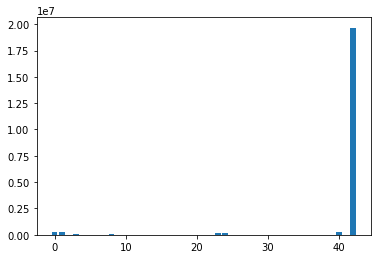

In [64]:
plt.bar(list(mapqs.keys()), list(mapqs.values()))

In [3]:
bam_file = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered.sorted.bam'
repid = '197b'
with pysam.AlignmentFile(bam_file, 'rb') as f:
    with pysam.AlignmentFile(bam_file, 'rb') as f2:
        rlen = []
        mlen = []
        for read in f.fetch(contig=f'{repid}_7_4kbrf'):
            rlen.append(read.query_length)
            try:
                mate = f2.mate(read)
            except ValueError:
                mlen.append(-1)
            else:
                mlen.append(mate.query_length)
rlen = np.array(rlen)
mlen = np.array(mlen)

In [28]:
seqstr_197b = list(utils.read_fasta('/home/alex/shared_folder/JB_seqdes/Projet_Julien/197b_7_4kbrf.fa').values())[0]
seqstr_197b

'taaggaaacaagaataatatcaccttgtcccatccagactttctttcttaacttacctctaatatgggccattctcttattaccatcaaagcaactggcttcgactcttccattacccaacatcttggtgatttgagcatattcttggccttcttccttataaataagttcacgctttggaccgtcagagtcgttcttacctcttctaccttttttaccacctttagtgtttttcttacccatgatgaactttgctctatattacactagtgcttttgcaagtacaccttctacataagtaaaggtttctttcagcaaactaaaattgaagcttttttcaatttttcactattacttcttgcggcgaaaacaaaaatgaaaaaaaagtgaaaaatagcgttcgtgtataatgattattataagatctcattaacaatatgagaaataacccacattgttagttgaaacttgtttgtaatttatcgtgctgtatatacatatatacgtaaaaggaagatcgtacttttatatttataatcgctcgtaaaaactataactgaagaataagaaagagaacattttgaaagtacaggagggaaaatgatcgcttaggcggctgtcaagtcatgaaggatggtaaaaagttcattgacaccattgatatgttccttggcataagtggatcttgagctaccgtaaagaatggtgtaaccaaattttagattgttcttttcaacctcttgcttcactaatttaaataatggttcaataataggtgatgtcgaaccggaaacgcaaacgaaatctacctggttttggaaatgcttcttattattaccgacggacatcgaagaggatgttcttgatagagatattctgctattgtcagtaggactgacgccactgttgtaaaatttcatcaaaaactcagcggcggctaaggctagccccgtttgttgaacgaagacaatatccttatgcacataagcgtgaatatcc

In [29]:
one_hot_197b = utils.one_hot_encode(seqstr_197b)
one_hot_197b

array([[False, False, False,  True],
       [ True, False, False, False],
       [ True, False, False, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [ True, False, False, False]])

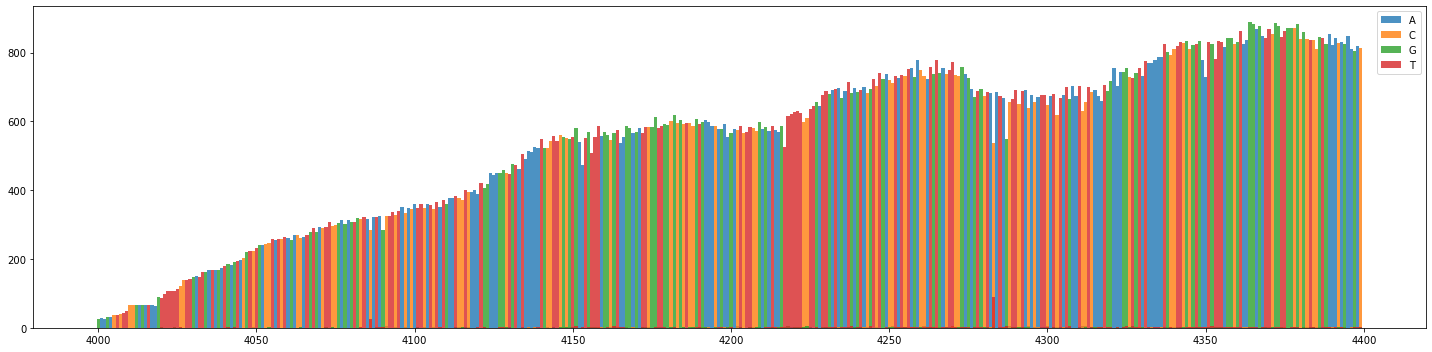

In [30]:
bam_file = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered.sorted.bam'
repid = '197b'
with pysam.AlignmentFile(bam_file, 'rb') as f:
    res = f.count_coverage(contig=f'{repid}_7_4kbrf', start=0000, stop=9378)
fig, ax = plt.subplots(1, 1, figsize=(20, 5), facecolor='w', layout='tight')
start = 4000
stop = 4400
for arr, lab in zip(res, 'ACGT'):
    ax.bar(np.arange(start, stop), np.array(arr)[start:stop], label=lab, width=1, alpha=0.8)
ax.legend()
    # i = 0
    # for read in f.pileup(contig=f'{repid}_7_4kbrf', start=0, stop=9378):
    #     print(read)
    #     i += 1
    #     if i >= 15:
    #         break

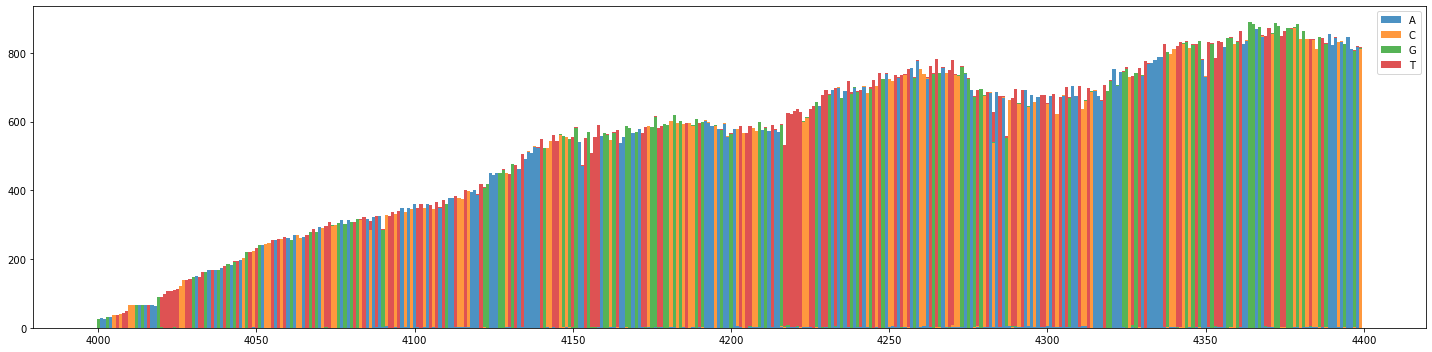

In [40]:
base_counts = np.array([arr for arr in res])
fig, ax = plt.subplots(1, 1, figsize=(20, 5), facecolor='w', layout='tight')
start = 4000
stop = 4400
for i, lab in enumerate('ACGT'):
    if i == 0:
        bottom = 0
    else:
        bottom += base_counts[i-1, start:stop]
    ax.bar(np.arange(start, stop), base_counts[i, start:stop], bottom=bottom, label=lab, width=1, alpha=0.8)
ax.legend()

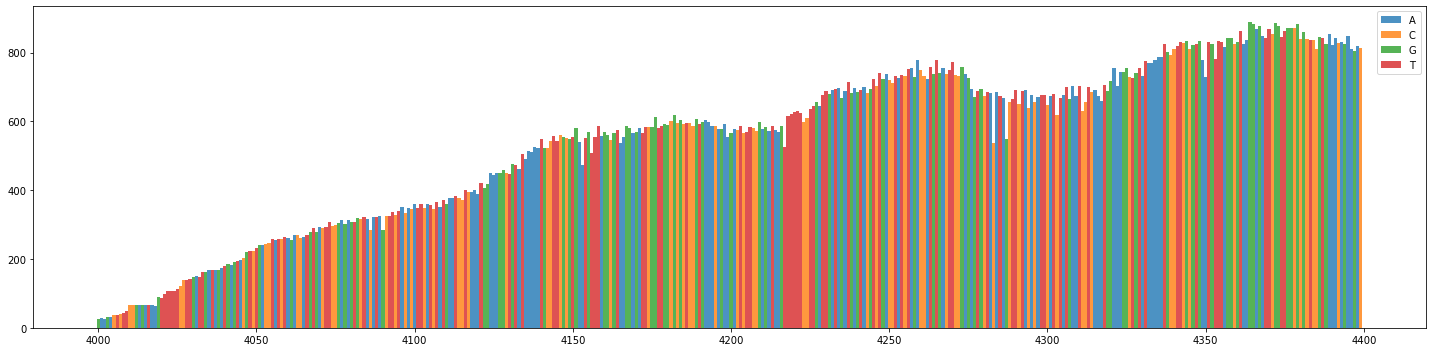

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5), facecolor='w', layout='tight')
start = 4000
stop = 4400
for i, (arr, lab) in enumerate(zip(res, 'ACGT')):
    ax.bar(np.arange(start, stop), np.array(arr)[start:stop]*one_hot_197b[start:stop, i], label=lab, width=1, alpha=0.8)
ax.legend()

In [38]:
diff_size = (rlen != mlen) & (mlen != -1)
print(len(rlen), np.sum(rlen != mlen), np.sum(diff_size), np.sum(mlen == -1))
# rlen[rlen != mlen] - mlen[rlen != mlen]

9618 5178 4886 292


In [45]:
print(np.sum(rlen != 151))
print(np.sum((rlen != 151) & (mlen != 151) & (mlen != -1)))
print(np.sum((rlen != 151) & (mlen != 151) & (mlen != -1) & (rlen != mlen)))

4190
1944
655


(0.0, 100.0)

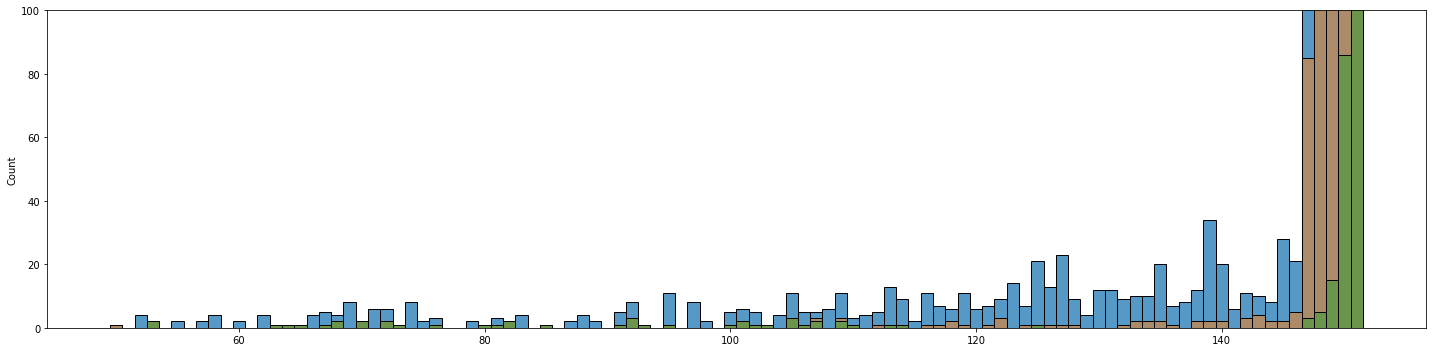

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5), facecolor='w', layout='tight')
sns.histplot(rlen, discrete=True, ax=ax)
sns.histplot(rlen[rlen != mlen], discrete=True, ax=ax, color=colors[1], alpha=0.5)
sns.histplot(rlen[mlen == -1], discrete=True, ax=ax, color=colors[2], alpha=0.5)
ax.set_ylim(top=100)

In [40]:
bam_file = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_101bp_max250.sorted.bam'
with pysam.AlignmentFile(bam_file, 'rb') as f:
    tlens = []
    for read in f.fetch():
        if read.is_read1:
            if read.is_proper_pair:
                tlens.append(abs(read.template_length))
            else:
                tlens.append(0)
print(np.sum(np.array(tlens) == 0) / len(tlens))
print(np.sum(np.array(tlens) > 0) / len(tlens))

0.06997845465855339
0.9300215453414467


In [239]:
from deeptools.getFragmentAndReadSize import get_read_and_fragment_length
print(get_read_and_fragment_length(bam_file, numberOfProcessors=1))

({'sample_size': 5237, 'min': 0.0, 'qtile25': 0.0, 'mean': 55.09948443765514, 'median': 0.0, 'qtile75': 138.0, 'max': 250.0, 'std': 71.59975524428974, 'mad': 0.0, 'qtile10': 0.0, 'qtile20': 0.0, 'qtile30': 0.0, 'qtile40': 0.0, 'qtile60': 0.0, 'qtile70': 129.0, 'qtile80': 145.0, 'qtile90': 154.0, 'qtile99': 191.0}, {'sample_size': 5237, 'min': 50.0, 'qtile25': 50.0, 'mean': 50.0, 'median': 50.0, 'qtile75': 50.0, 'max': 50.0, 'std': 0.0, 'mad': 0.0, 'qtile10': 50.0, 'qtile20': 50.0, 'qtile30': 50.0, 'qtile40': 50.0, 'qtile60': 50.0, 'qtile70': 50.0, 'qtile80': 50.0, 'qtile90': 50.0, 'qtile99': 50.0})


In [3]:
def get_bam_pairs(bam_file, contig=None):
    """Retrieve proper pairs from bam file as a dictionary.
    
    This requires read pairs to have the same query name

    Parameters
    ----------
    bam_file: str
        Pathname of the bam file to parse
    contig: str, default=None
        Name of the contig to restrict the search to.

    Returns
    -------
    pairs: dict[list]
        Dictionnary mapping read name to a list of the two read objects
    """
    with pysam.AlignmentFile(bam_file, 'rb') as f:
        pairs = defaultdict(list)
        for read in f.fetch(contig=contig):
            if read.is_proper_pair:
                pairs[read.query_name].append(read)
    return pairs


def get_start_end(bam_file, contig, pos_start, pos_end, start0=False, sense=True, rna=True):
    """Retrieve start and endpoints of each fragment of a bam file.

    Parameters
    ----------
    bam_file: str
        Pathname of the bam file to parse
    sense: bool, default=True
        If True, output seperately fragments aligned on the forward and reverse strand
    rna: bool, default=True
        If True, consider that the true RNA fragment is on the other strand than the one the fragment is aligned to

    Returns
    -------
    starts, ends : list, length=l
        List of start and end positions of each fragment respectively.
        They are of same length, such that the i-th value in starts corresponds to the i-th element in ends.
        If sense is set, contains only forward aligned fragments, otherwise all fragments
    rev_starts, rev_ends: list, optional, length=m
        Only if sense is set to True. Counterparts of starts and ends but on the reverse strand.
    """
    pairs = get_bam_pairs(bam_file, contig=contig)
    starts, ends = [], []
    if sense:
        rev_starts, rev_ends = [], []
    for pair in pairs.values():
        assert len(pair) == 2
        read, _ = pair
        assert not read.is_reverse
        pos, tlen = read.reference_start, read.template_length
        start = pos
        is_reverse = sense and (read.is_read2 != rna)  # for RNA fragments, forward read must be read1, otherwise it must be read2
        if is_reverse:
            start = pos + abs(tlen)
        if pos >= pos_start and pos + abs(tlen) < pos_end:  # select fragments in the region
            if start0:
                start -= pos_start  # correct to have 0 as the first position on the region
            # Compute end from optionnaly translated start
            if is_reverse:
                end = start - abs(tlen)
                rev_starts.append(start)
                rev_ends.append(end)
            else:
                end = start + abs(tlen)
                starts.append(start)
                ends.append(end)
    if sense:
        return starts, ends, rev_starts, rev_ends
    else:
        return starts, ends


def get_rep_start_end(bam_file, repid, single_start=True, single_end=True, corrected_end=False, sense=True, rna=True):
    """Retrieve start and endpoints of each fragment of a bam file.
    
    This only works for the bam files of the JB_seqdes project, but can be adapted to general files.
    It wraps conviently some code and analysis specific to the names and questions.
    The positions are to be considered along the repeated sequences,
    meaning the position 0 refers to the start of the first repeat.

    Parameters
    ----------
    bam_file: str
        Pathname of the bam file to parse
    repid: str
        Name of the synthetic repeated sequence
    single_start: bool, default=True
        If True, translate start and end points of a multiple of the repeat length
        so that the start appears on the first repeat, but distance is maintained
    single_end: bool, default=True
        If True, translate end points of a multiple of the repeat length so that they appear on the first repeat.
        Setting single_end without setting single_start may lead to unexpected behavior
    corrected_end: bool, default=False
        If True, translate end points of a multiple of the repeat length so to reduce
        the distance between start and end to the smallest value greater than the read length (valid alignment).
        These corrected ends are output seperately.
    sense: bool, default=True
        If True, output seperately fragments aligned on the forward and reverse strand
    rna: bool, default=True
        If True, consider that the true RNA fragment is on the other strand than the one the fragment is aligned to

    Returns
    -------
    starts, ends : list, length=l
        List of start and end positions of each fragment respectively.
        They are of same length, such that the i-th value in starts corresponds to the i-th element in ends.
        If sense is set, contains only forward aligned fragments, otherwise all fragments
    modends : list, optional, length=l
        Only if corrected_end is set to True. List of corrected ends of aligned fragments
    rev_starts, rev_ends, rev_modends: list, optional, length=m
        Only if sense is set to True. Counterparts of starts, ends and modends but on the reverse strand.
    """
    rlen = int(repid[:3])
    pairs = get_bam_pairs(bam_file, contig=f'{repid}_7_4kbrf')
    starts, ends, modends = [], [], []
    if sense:
        rev_starts, rev_ends, rev_modends = [], [], []
    for pair in pairs.values():
        assert len(pair) == 2
        read, read2 = pair
        assert not read.is_reverse
        pos, tlen = read.reference_start, read.template_length
        start = pos
        is_reverse = sense and (read.is_read2 != rna)  # for RNA fragments, forward read must be read1, otherwise it must be read2
        if is_reverse:
            start = pos + abs(tlen)
        if pos >= 4000 and pos + abs(tlen) < 4000 + rlen*7:  # select fragments fully on the repeats
            start -= 4000  # correct to have 0 as the first position on the repeat
            if single_start:
                start %= rlen  # perform start translation using modulo
            # Compute end from optionnaly translated start
            if is_reverse:
                rev_starts.append(start)
                end = start - abs(tlen)
            else:
                starts.append(start)
                end = start + abs(tlen)
            if corrected_end:
                # Perform translation using modulo, then optionnally increase by one repeat length
                modtlen = abs(tlen) % rlen
                if modtlen < min(read.query_alignment_length, read2.query_alignment_length):
                    # If the two reads have different sizes, consider the smallest one
                    modtlen += rlen
                if is_reverse:
                    rev_modends.append(start - modtlen)
                else:
                    modends.append(start + modtlen)
            elif single_end:
                end %= rlen  # perform end translation using modulo
            if is_reverse:
                rev_ends.append(end)
            else:
                ends.append(end)   
    if corrected_end:
        if sense:
            return starts, ends, modends, rev_starts, rev_ends, rev_modends
        else:
            return starts, ends, modends
    elif sense:
        return starts, ends, rev_starts, rev_ends
    else:
        return starts, ends

In [82]:
# bam_file, repid, run = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_trimfiltered_max250.sorted.bam', '167', '2020'
# bam_file, repid, run = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_trimfiltered_max250.sorted.bam', '167', '2023_1'
# bam_file, repid, run = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_trimfiltered_max250.sorted.bam', '167', '2023_2'
# bam_file, repid, run = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_trimfiltered_max250.sorted.bam', '197a', '2020'
# bam_file, repid, run = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_trimfiltered_max250.sorted.bam', '197a', '2023_1'
# bam_file, repid, run = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_trimfiltered_max250.sorted.bam', '197a', '2023_2'
bam_file, repid, run = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.sorted.bam', '197b', '2020'
# bam_file, repid, run = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.sorted.bam', '197b', '2023_1'
# bam_file, repid, run = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.sorted.bam', '197b', '2023_2'
# bam_file, repid, run = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_trimfiltered_max250.sorted.bam', '237', '2020_1'
# bam_file, repid, run = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_trimfiltered_max250.sorted.bam', '237', '2020_2'
# bam_file, repid, run = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_trimfiltered_max250.sorted.bam', '237', '2023_1'
# bam_file, repid, run = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_trimfiltered_max250.sorted.bam', '237', '2023_2'


In [83]:
# bam_file_rna, repid = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered.sorted.bam', '197b'
bam_file_rna, repid = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered.sorted.bam', '197b'
rlen = int(repid[:3])

In [84]:
starts, ends, modends, rev_starts, rev_ends, rev_modends = get_rep_start_end(bam_file_rna, repid, single_start=True, corrected_end=True)
starts_nuc, ends_nuc, modends_nuc = get_rep_start_end(bam_file, repid, single_start=True, corrected_end=True, sense=False)

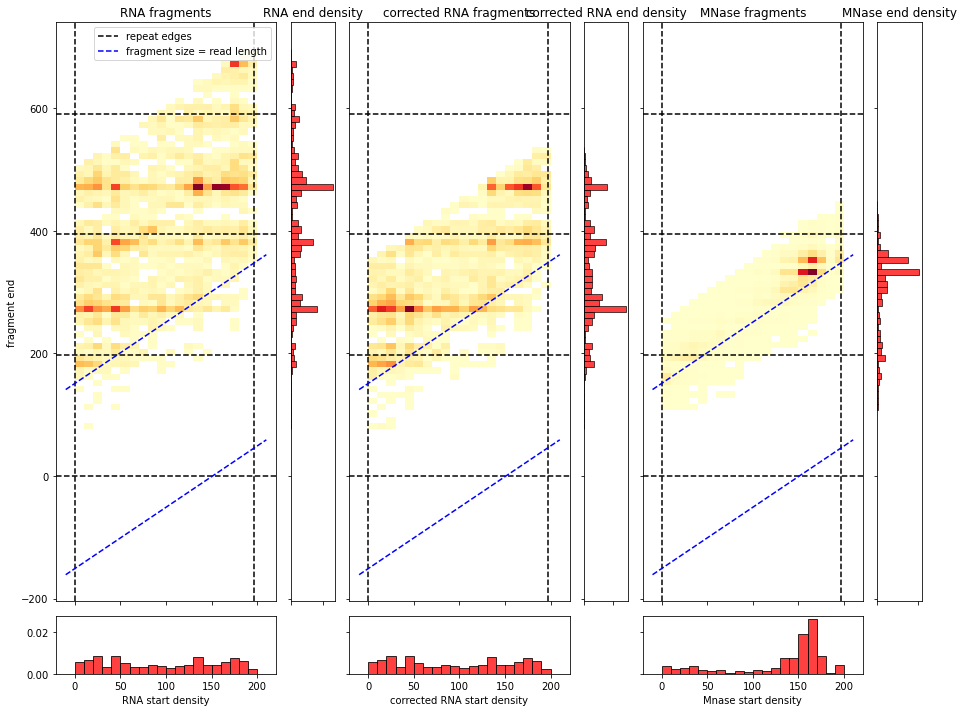

In [85]:
fig, axes = plt.subplots(2, 6, figsize=(13, 10), facecolor='w', layout='tight', sharex='col', sharey='row',
                         gridspec_kw={'height_ratios': [10, 1], 'width_ratios': [5, 1, 5, 1, 5, 1]})
binwidth = 10
sns.histplot(x=starts, y=ends, binwidth=binwidth, cmap='YlOrRd', ax=axes[0, 0])
sns.histplot(x=starts, y=modends, binwidth=binwidth, cmap='YlOrRd', ax=axes[0, 2])
sns.histplot(x=starts_nuc, y=ends_nuc, binwidth=binwidth, cmap='YlOrRd', ax=axes[0, 4])
binrange = None # (rlen-rlen%binwidth, rlen*2) # np.array(ends)%rlen+rlen #
sns.histplot(x=starts, binwidth=binwidth, color='r', stat='density', ax=axes[1, 0])
sns.histplot(y=ends, binwidth=binwidth, binrange=binrange, color='r', stat='density', ax=axes[0, 1])
sns.histplot(x=starts, binwidth=binwidth, color='r', stat='density', ax=axes[1, 2])
sns.histplot(y=modends, binwidth=binwidth, binrange=binrange, color='r', stat='density', ax=axes[0, 3])
sns.histplot(x=starts_nuc, binwidth=binwidth, color='r', stat='density', ax=axes[1, 4])
sns.histplot(y=ends_nuc, binwidth=binwidth, binrange=binrange, color='r', stat='density', ax=axes[0, 5])
for ax in axes[1, 1::2]:
    ax.set_axis_off()

for ax in axes[0, ::2].flatten():
    xmin, xmax, ymin, ymax = ax.axis()
    for i in range(8):
        if i == 0:
            ax.axvline(rlen*i, color='k', linestyle='--', label='repeat edges')
        elif rlen*i < xmax:
            ax.axvline(rlen*i, color='k', linestyle='--')
        if rlen*i < ymax:
            ax.axhline(rlen*i, color='k', linestyle='--')
    ax.plot([xmin, xmax], [xmin+151, xmax+151], color='b', linestyle='--', label='fragment size = read length')
    ax.plot([xmin, xmax], [xmin-151, xmax-151], color='b', linestyle='--')
# axes[0, 1].set_xlabel('fragment start')
axes[0, 0].set_ylabel('fragment end')
axes[1, 0].set_ylabel('')
axes[0, 0].legend()

axes[0, 0].set_title('RNA fragments')
axes[0, 1].set_title('RNA end density')
axes[0, 2].set_title('corrected RNA fragments')
axes[0, 3].set_title('corrected RNA end density')
axes[0, 4].set_title('MNase fragments')
axes[0, 5].set_title('MNase end density')
axes[1, 0].set_xlabel('RNA start density')
axes[1, 2].set_xlabel('corrected RNA start density')
axes[1, 4].set_xlabel('Mnase start density')

plt.show()

In [54]:
starts, ends, rev_starts, rev_ends = get_rep_start_end(bam_file_rna, repid, single_start=True, single_end=True)
starts_nuc, ends_nuc = get_rep_start_end(bam_file, repid, single_start=True, single_end=True, sense=False)

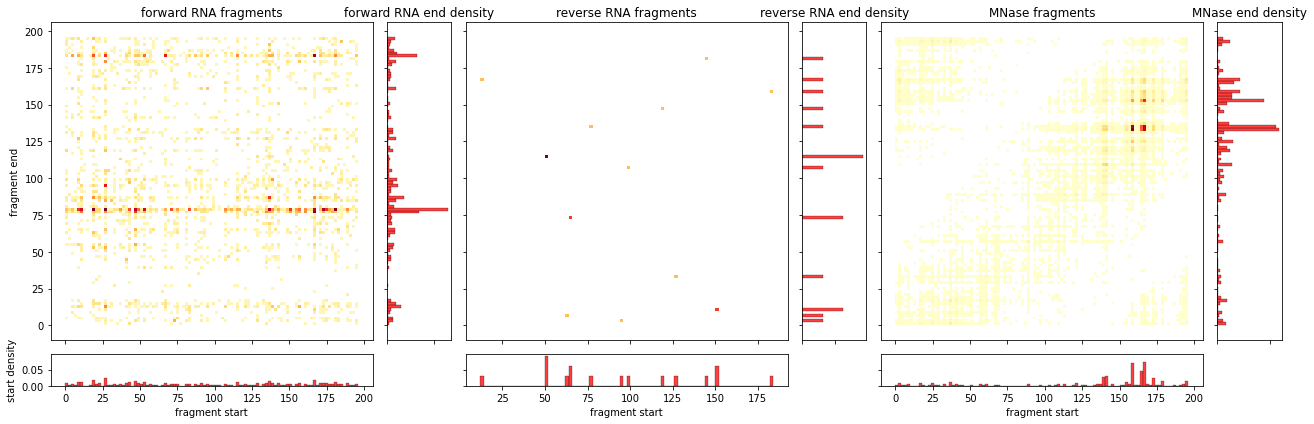

In [55]:
fig, axes = plt.subplots(2, 6, figsize=(18, 6), facecolor='w', layout='tight', sharex='col', sharey='row',
                         gridspec_kw={'height_ratios': [10, 1], 'width_ratios': [5, 1, 5, 1, 5, 1]})
binwidth = 2
sns.histplot(x=starts, y=ends, binwidth=binwidth, cmap='YlOrRd', ax=axes[0, 0])
sns.histplot(x=rev_starts, y=rev_ends, binwidth=binwidth, cmap='YlOrRd', ax=axes[0, 2])
sns.histplot(x=starts_nuc, y=ends_nuc, binwidth=binwidth, cmap='YlOrRd', ax=axes[0, 4])
binrange = None # (rlen-rlen%binwidth, rlen*2)
sns.histplot(x=starts, binwidth=binwidth, color='r', stat='density', ax=axes[1, 0])
sns.histplot(y=ends, binwidth=binwidth, color='r', stat='density', ax=axes[0, 1])
sns.histplot(x=rev_starts, binwidth=binwidth, color='r', stat='density', ax=axes[1, 2])
sns.histplot(y=rev_ends, binwidth=binwidth, color='r', stat='density', ax=axes[0, 3])
sns.histplot(x=starts_nuc, binwidth=binwidth, color='r', stat='density', ax=axes[1, 4])
sns.histplot(y=ends_nuc, binwidth=binwidth, color='r', stat='density', ax=axes[0, 5])
for ax in axes[1, 1::2]:
    ax.set_axis_off()

axes[0, 0].set_ylabel('fragment end')
axes[1, 0].set_xlabel('fragment start')
axes[1, 2].set_xlabel('fragment start')
axes[1, 4].set_xlabel('fragment start')
axes[1, 0].set_ylabel('start density')

axes[0, 0].set_title('forward RNA fragments')
axes[0, 1].set_title('forward RNA end density')
axes[0, 2].set_title('reverse RNA fragments')
axes[0, 3].set_title('reverse RNA end density')
axes[0, 4].set_title('MNase fragments')
axes[0, 5].set_title('MNase end density')

plt.show()

In [71]:
single_starts_nuc, single_ends_nuc = get_rep_start_end(bam_file, repid, single_start=True, single_end=True, sense=False)

In [57]:
seqstr = list(utils.read_fasta(f'/home/alex/shared_folder/JB_seqdes/Projet_Julien/{repid}_7_4kbrf.fa').values())[0][4000:4000+rlen]
seqstr

'GAAGACTCTTCCGAGATAAGTTTTTTCCTTGATTGATAGATGAGTACGTCTGACCTATCTAGACCATGTGACTTCCGAGAGTGCTACATAGCTTCTACACATTCATCTATGAATCCTCAAATGGAAAGGCTGTATAAAAATGCCTTCGCGTGAATGTTTAGGCGTAAGGAGATTCGGTTGGCGCGCTCCGTGAAACA'

Text(0, 0.5, 'fragment end')

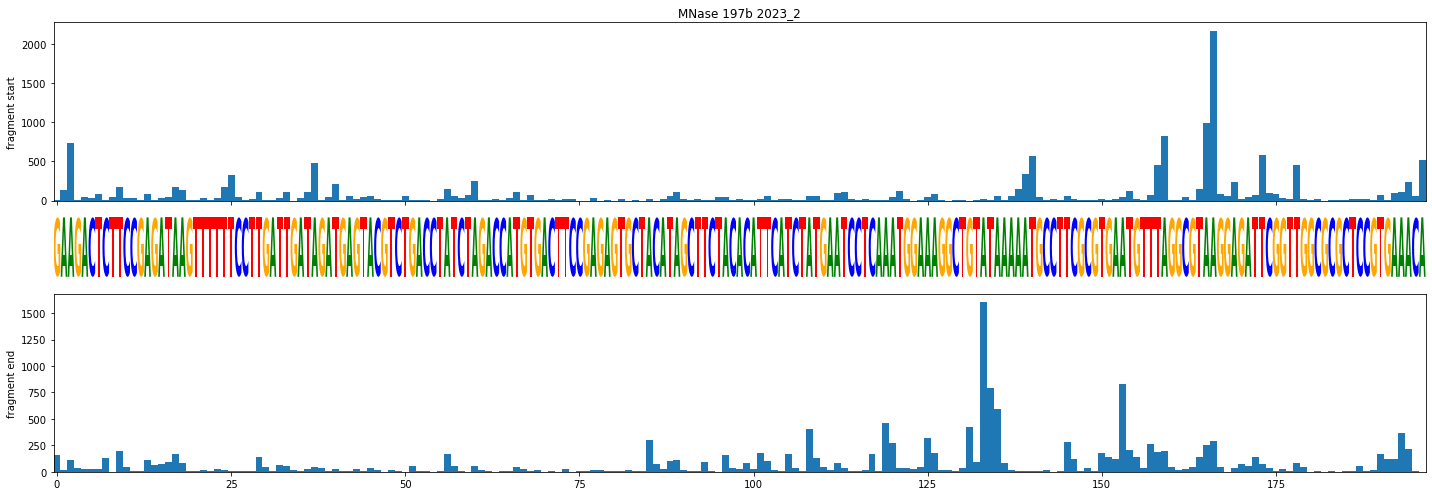

In [72]:
binwidth = 1
counts_start, bins = np.histogram(single_starts_nuc, np.arange(-0.5, rlen+binwidth-1, binwidth))
counts_end, bins = np.histogram(single_ends_nuc, np.arange(-0.5, rlen+binwidth-1, binwidth))
pos = np.arange(0, rlen+binwidth-1, binwidth)
amax = 0 #np.argmax(counts)
fig, axes = plt.subplots(3, 1, figsize=(20, 7), facecolor='w', layout='tight', sharex=True,
                         gridspec_kw={'height_ratios': [3, 1, 3]})
axes[0].set_title(f'MNase {repid} {run}')
axes[0].bar(pos[amax:], counts_start[amax:], width=binwidth)
axes[0].set_ylabel('fragment start')
lm.Logo(pd.DataFrame(utils.one_hot_encode(seqstr), columns=list('ACGT')), ax=axes[1])
axes[1].set_axis_off()
axes[2].bar(pos[amax:], counts_end[amax:], width=binwidth)
axes[2].set_ylabel('fragment end')

In [86]:
repid = '197b'
rlen = int(repid[:3])
seqstr = list(utils.read_fasta(f'/home/alex/shared_folder/JB_seqdes/Projet_Julien/{repid}_7_4kbrf.fa').values())[0][4000:4000+rlen]
start_ends = []
for bam_file in ['/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.sorted.bam',
                 '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.sorted.bam',
                 '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.sorted.bam']:
    start_ends.append(get_rep_start_end(bam_file, repid, single_start=True, single_end=True, sense=False))
runs = ['2020', '2023_1', '2023_2']
n_runs = len(runs)
assert n_runs == len(start_ends)

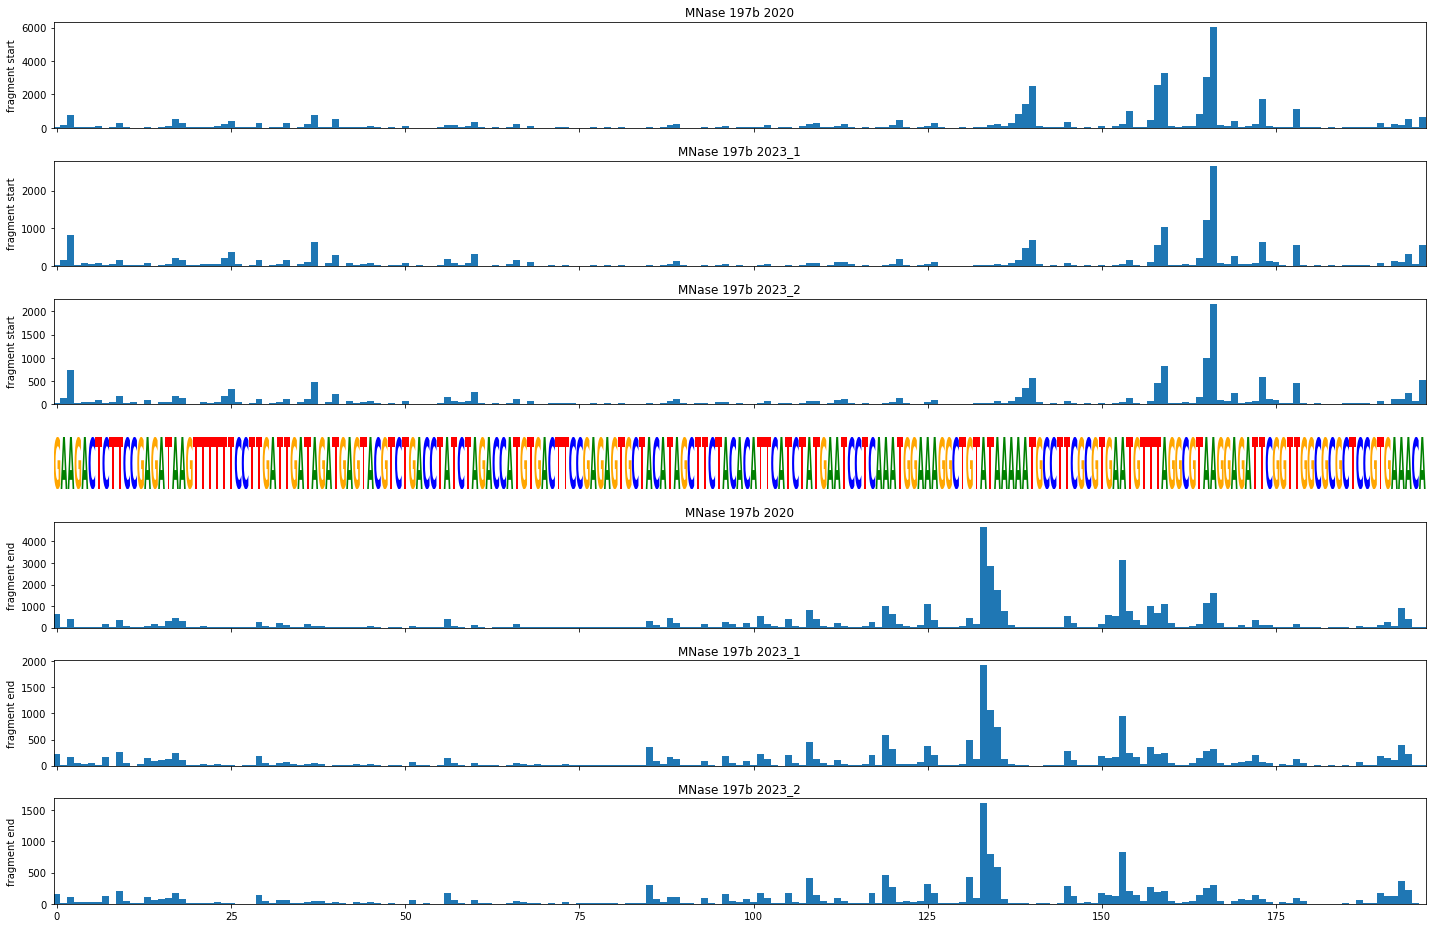

In [87]:
binwidth = 1
pos = np.arange(0, rlen+binwidth-1, binwidth)
fig, axes = plt.subplots(n_runs*2+1, 1, figsize=(20, n_runs*4+1), facecolor='w', layout='tight', sharex=True,
                         gridspec_kw={'height_ratios': [2]*n_runs + [1] + [2]*n_runs})
for i, ((starts, ends), run) in enumerate(zip(start_ends, runs)):
    counts_start, bins = np.histogram(starts, np.arange(-0.5, rlen+binwidth-1, binwidth))
    counts_end, bins = np.histogram(ends, np.arange(-0.5, rlen+binwidth-1, binwidth))
    axes[i].set_title(f'MNase {repid} {run}')
    axes[i].bar(pos, counts_start, width=binwidth)
    axes[i].set_ylabel('fragment start')
    axes[i+n_runs+1].set_title(f'MNase {repid} {run}')
    axes[i+n_runs+1].bar(pos, counts_end, width=binwidth)
    axes[i+n_runs+1].set_ylabel('fragment end')
lm.Logo(pd.DataFrame(utils.one_hot_encode(seqstr), columns=list('ACGT')), ax=axes[n_runs])
axes[n_runs].set_axis_off()

In [90]:
repid = '197b'
rlen = int(repid[:3])
seqstr = list(utils.read_fasta(f'/home/alex/shared_folder/JB_seqdes/Projet_Julien/{repid}_7_4kbrf.fa').values())[0][4000:4000+rlen]
start_ends = []
for bam_file in ['/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered.sorted.bam',
                 '/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered.sorted.bam']:
    start_ends.append(get_rep_start_end(bam_file, repid, single_start=True, single_end=True, sense=True)[:2])
runs = ['2022', '2023']
n_runs = len(runs)
assert n_runs == len(start_ends)

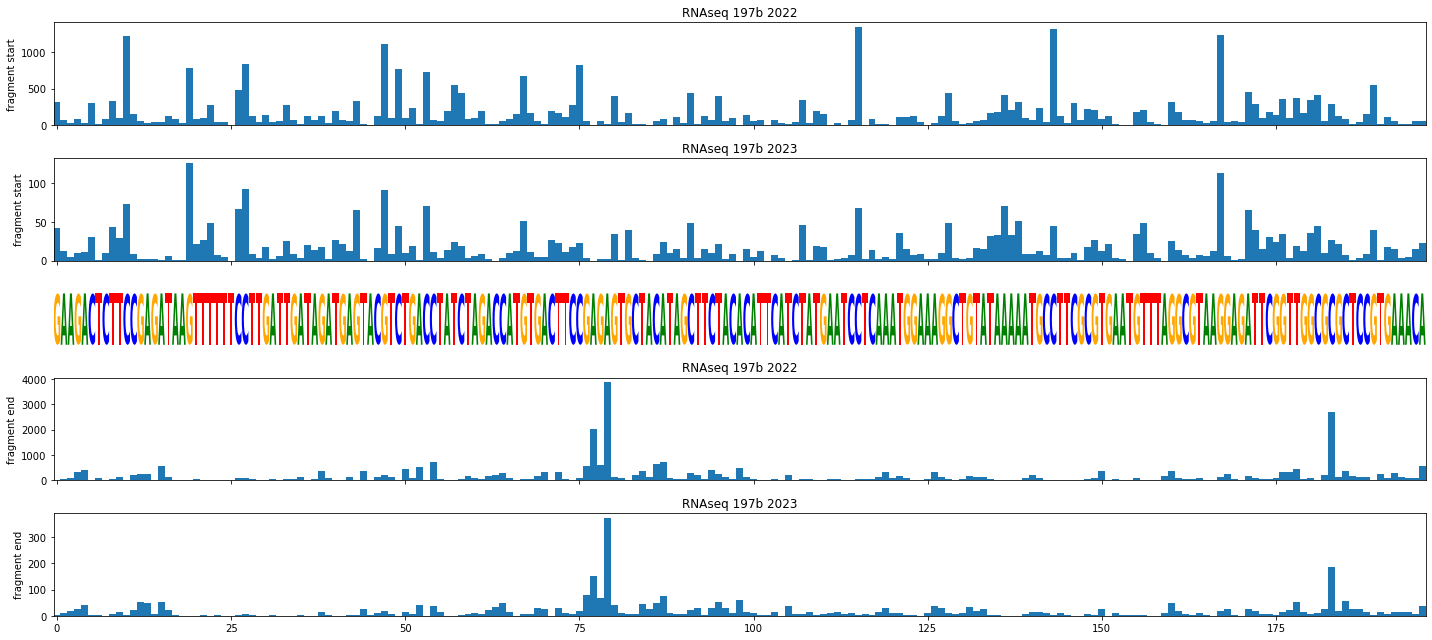

In [91]:
binwidth = 1
pos = np.arange(0, rlen+binwidth-1, binwidth)
fig, axes = plt.subplots(n_runs*2+1, 1, figsize=(20, n_runs*4+1), facecolor='w', layout='tight', sharex=True,
                         gridspec_kw={'height_ratios': [2]*n_runs + [1] + [2]*n_runs})
for i, ((starts, ends), run) in enumerate(zip(start_ends, runs)):
    counts_start, bins = np.histogram(starts, np.arange(-0.5, rlen+binwidth-1, binwidth))
    counts_end, bins = np.histogram(ends, np.arange(-0.5, rlen+binwidth-1, binwidth))
    axes[i].set_title(f'RNAseq {repid} {run}')
    axes[i].bar(pos, counts_start, width=binwidth)
    axes[i].set_ylabel('fragment start')
    axes[i+n_runs+1].set_title(f'RNAseq {repid} {run}')
    axes[i+n_runs+1].bar(pos, counts_end, width=binwidth)
    axes[i+n_runs+1].set_ylabel('fragment end')
lm.Logo(pd.DataFrame(utils.one_hot_encode(seqstr), columns=list('ACGT')), ax=axes[n_runs])
axes[n_runs].set_axis_off()

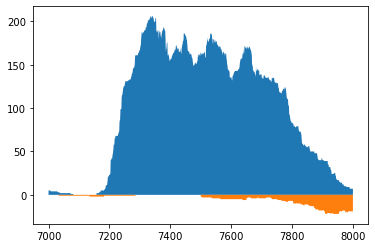

In [100]:
rna2023_197b_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads_for.bw')
rna2023_197b_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads_rev.bw')
start = 7000 # 4000+7*rlen
stop = 8000#+7*rlen
plt.fill_between(np.arange(start, stop), 0, rna2023_197b_for['197b_7_4kbrf'][start:stop])
plt.fill_between(np.arange(start, stop), 0, -rna2023_197b_rev['197b_7_4kbrf'][start:stop])

In [4]:
rna2022_197b_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads_for.bw')
rna2022_197b_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads_rev.bw')
rna2023_197b_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads_for.bw')
rna2023_197b_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads_rev.bw')

mnase2020_197b = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.bw')
mnase2023_197b_1 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.bw')
mnase2023_197b_2 = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.bw')

In [118]:
print(np.sum([np.sum(v) for v in rna2022_197b_for.values()]))
print(np.sum([np.sum(v) for v in rna2023_197b_for.values()]))

999999.94
1000000.0


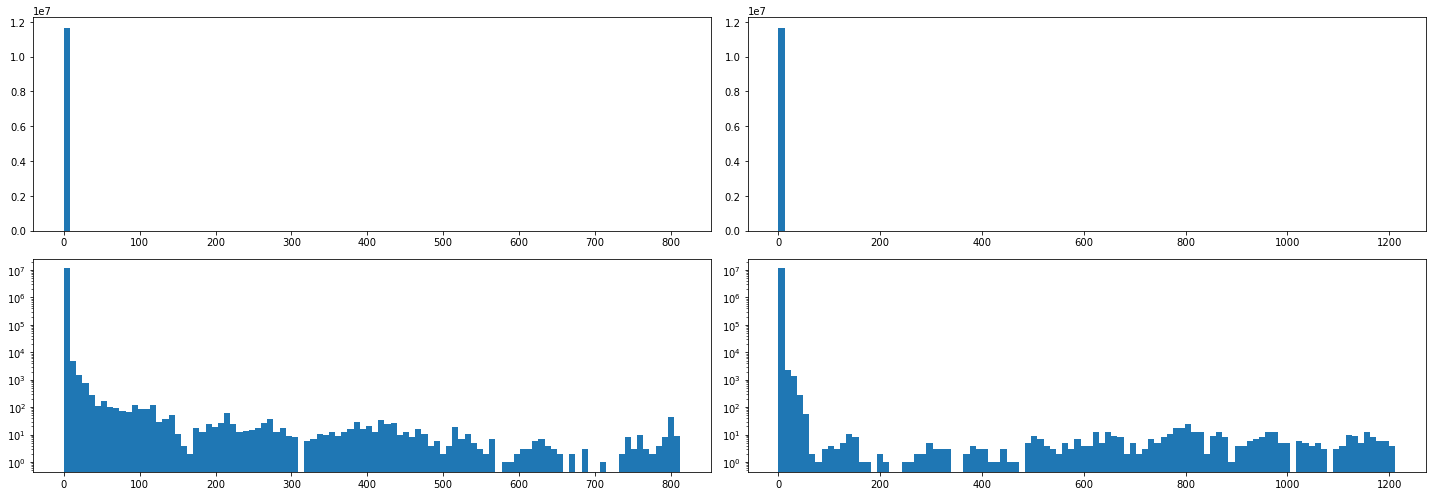

In [119]:
fig, axes = plt.subplots(2, 2, figsize=(20, 7), facecolor='w', layout='tight')
axes[0, 0].hist(np.concatenate([v for v in rna2022_197b_for.values()]), bins=100)
axes[1, 0].hist(np.concatenate([v for v in rna2022_197b_for.values()]), bins=100)
axes[0, 1].hist(np.concatenate([v for v in rna2023_197b_for.values()]), bins=100)
axes[1, 1].hist(np.concatenate([v for v in rna2023_197b_for.values()]), bins=100)
for ax in axes[1, :]:
    ax.set_yscale('log')
plt.show()

In [135]:
keys = []
for k, v1 in rna2022_197b_for.items():
    v2 = rna2023_197b_for[k]
    if abs(np.mean(v1) - np.mean(v2)) > 1:
        print(k, len(v1), len(v2), np.mean(v1), np.mean(v2))
        keys.append(k)

gi|696443553|gb|JRIO01000055.1| 8330 8330 27.641705 44.34152
gi|696443035|gb|JRIO01000211.1| 479 479 0.47649994 2.159706
gi|696443021|gb|JRIO01000215.1| 376 376 7.28041 0.3081626
gi|696443018|gb|JRIO01000216.1| 226 226 275.01178 1.2181721
gi|696442990|gb|JRIO01000224.1| 202 202 0.06124344 1.3041403
gi|696442984|gb|JRIO01000226.1| 225 225 11.562912 23.702772
gi|696442981|gb|JRIO01000227.1| 476 476 13.702518 0.16787578
gi|696442978|gb|JRIO01000228.1| 299 299 27.710278 0.13280562
gi|696442975|gb|JRIO01000229.1| 240 240 75.334564 0.21519737
gi|696442972|gb|JRIO01000230.1| 286 286 83.1922 1.1352804
gi|696442946|gb|JRIO01000239.1| 239 239 54.96559 0.750111
gi|696442935|gb|JRIO01000242.1| 216 216 0.33793855 1.477047
gi|696442914|gb|JRIO01000247.1| 282 282 0.13398282 2.0546436
gi|696442888|gb|JRIO01000253.1| 204 204 4.3987913 23.868118
gi|696442600|gb|JRIO01000334.1| 1175 1175 16.250854 0.0013358778
gi|696442582|gb|JRIO01000339.1| 1055 1055 1.2139269 8.458649e-05


In [191]:
print(len(rna2022_197b_for))
vals, counts = np.unique([len(v) for v in rna2022_197b_for.values()], return_counts=True)
print(counts)

345
[2 1 1 1 2 3 4 1 1 2 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1
 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


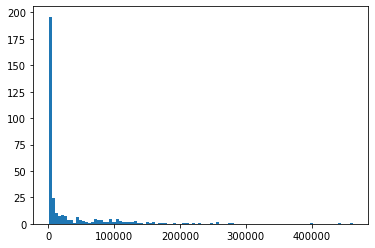

In [187]:
plt.hist([len(v) for v in rna2022_197b_for.values()], bins=100)
plt.show()

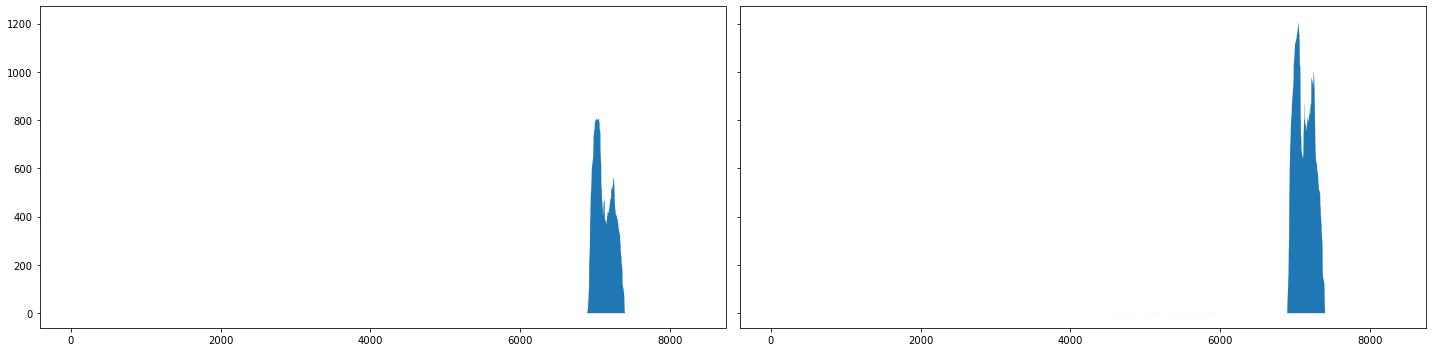

In [185]:
key_idx = 0
fig, axes = plt.subplots(1, 2, figsize=(20, 5), facecolor='w', layout='tight',
                         sharey=True
                         )
axes[0].fill_between(np.arange(len(rna2022_197b_for[keys[key_idx]])), 0, rna2022_197b_for[keys[key_idx]])
axes[1].fill_between(np.arange(len(rna2022_197b_for[keys[key_idx]])), 0, rna2023_197b_for[keys[key_idx]])

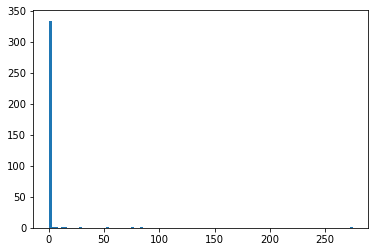

In [130]:
plt.hist([np.mean(v) for k, v in rna2022_197b_for.items()], bins=100)
plt.show()

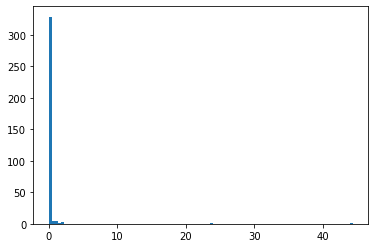

In [131]:
plt.hist([np.mean(rna2023_197b_for[k]) for k in rna2023_197b_for.keys()], bins=100)
plt.show()

In [18]:
repid = '197b'
rlen = int(repid[:3])
seqstr = list(utils.read_fasta(f'/home/alex/shared_folder/JB_seqdes/Projet_Julien/{repid}_7_4kbrf.fa').values())[0][4000:4000+7*rlen]
pos_start = 4000
pos_stop = 4000+6*rlen
start_ends = []
for bam_file, rna in [('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered.sorted.bam', True),
                      ('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered.sorted.bam', True),
                    #   ('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_trimfiltered_max250.sorted.bam', False),
                    #   ('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_trimfiltered_max250.sorted.bam', False),
                    #   ('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_trimfiltered_max250.sorted.bam', False),
                      ]:
    start_ends.append(get_start_end(bam_file, '197b_7_4kbrf', pos_start, pos_stop, start0=True, sense=True, rna=rna))
runs = ['RNAseq 2022', 'RNAseq 2023']
n_runs = len(runs)
assert n_runs == len(start_ends)

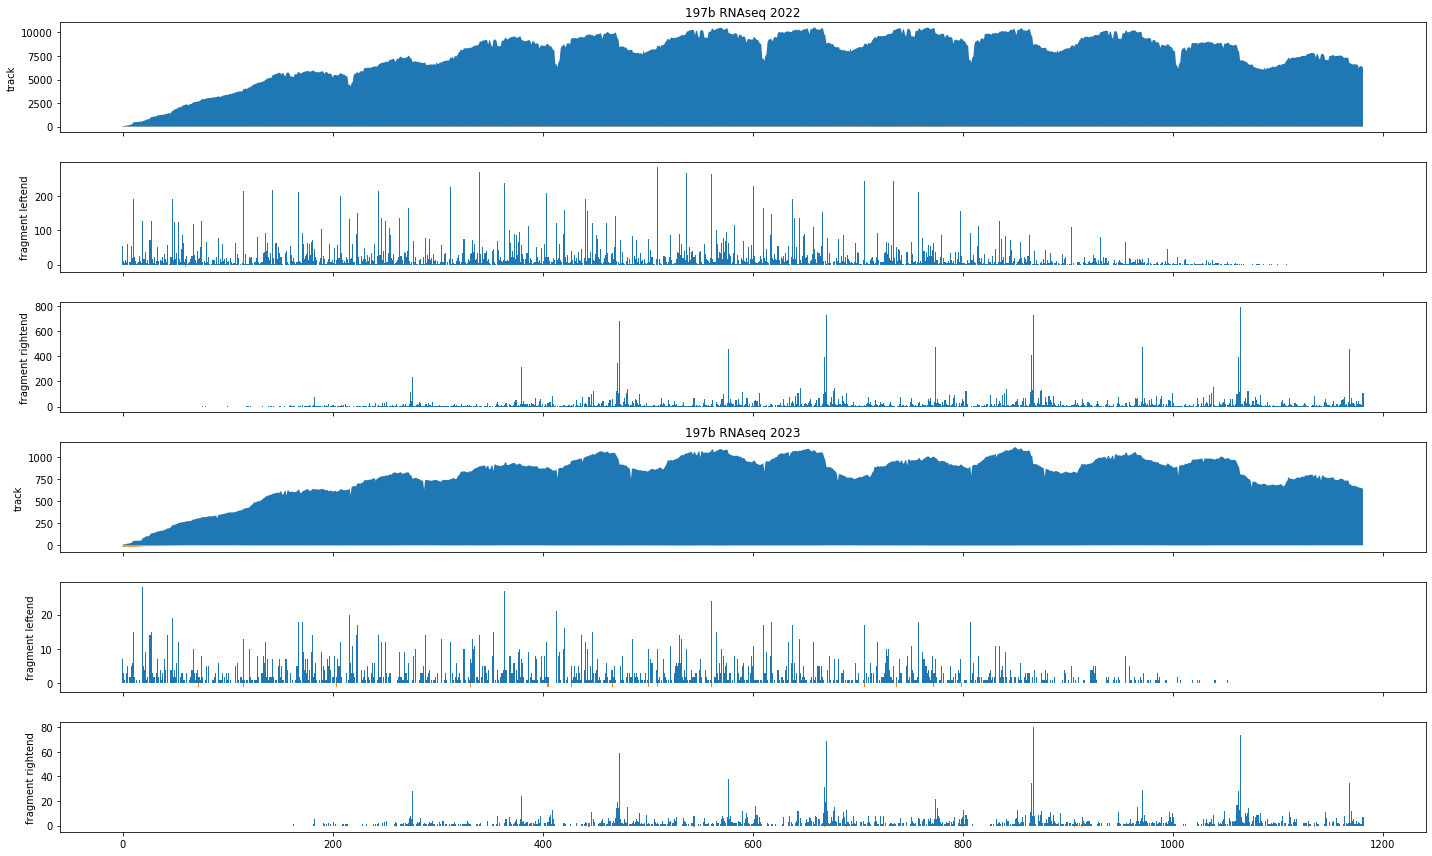

In [20]:
binwidth = 1
pos = np.arange(0, pos_stop-pos_start+binwidth-1, binwidth)
bins = np.arange(-0.5, pos_stop-pos_start+binwidth-1, binwidth)
fig, axes = plt.subplots(6, 1, figsize=(20, 12), facecolor='w', layout='tight', sharex=True)
for i, ((starts, ends, rev_starts, rev_ends), run, bw) in enumerate(zip(start_ends, runs, [(rna2022_197b_for, rna2022_197b_rev), (rna2023_197b_for, rna2023_197b_rev)])):
    ax_idx = 3*i
    counts_start, _ = np.histogram(starts, bins)
    counts_end, _ = np.histogram(ends, bins)
    counts_rev_start, _ = np.histogram(rev_starts, bins)
    counts_rev_end, _ = np.histogram(rev_ends, bins)
    axes[ax_idx].set_title(f'{repid} {run}')
    if isinstance(bw, tuple):
        axes[ax_idx].fill_between(pos, 0, bw[0]['197b_7_4kbrf'][pos_start:pos_stop])
        axes[ax_idx].fill_between(pos, 0, -bw[1]['197b_7_4kbrf'][pos_start:pos_stop])
        axes[ax_idx+1].bar(pos, counts_start, width=binwidth)
        axes[ax_idx+1].bar(pos, -counts_rev_end, width=binwidth)
        axes[ax_idx+2].bar(pos, counts_end, width=binwidth)
        axes[ax_idx+2].bar(pos, -counts_rev_start, width=binwidth)
    else:
        axes[ax_idx].fill_between(pos, 0, bw['197b_7_4kbrf'][pos_start:pos_stop])
        axes[ax_idx+1].bar(pos, counts_start+counts_rev_end, width=binwidth)
        axes[ax_idx+2].bar(pos, counts_end+counts_rev_start, width=binwidth)
    axes[ax_idx].set_ylabel('track')
    axes[ax_idx+1].set_ylabel('fragment leftend')
    axes[ax_idx+2].set_ylabel('fragment rightend')

In [154]:
bam_file, repid = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered.sorted.bam', '197b'
# bam_file, repid = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered.sorted.bam', '197b'
rlen = int(repid[:3])
pairs = get_bam_pairs(bam_file, f'{repid}_7_4kbrf')
print(len(pairs))
proper_pairs = []
for pair in pairs.values():
    assert len(pair) == 2
    read, read2 = pair
    if read.is_reverse:
        read, read2 = read2, read
    proper_pairs.append((read.reference_start, read.query_alignment_length, read2.query_alignment_length, read.template_length))
    pos, r1, r2, tlen = read.reference_start, read.query_alignment_length, read2.query_alignment_length, read.template_length
    # if r1 != r2 and abs(tlen) % 197 == min(r1, r2):
    #     print(f'{read}\n{read2}\n')
proper_pairs = sorted(proper_pairs)
print(len(proper_pairs))

37482
37482


In [155]:
# 4000 + 7*rlen == 5379
n_in_rep = 0
n_on_rep = 0
n_else = 0
n_both_truncated = 0
n_same_size = 0
n_smaller151 = 0
cpt = 0
n_small_left = 0
n_multiples = defaultdict(int)
n_near_multiples = defaultdict(int)
n_near2_multiples = defaultdict(int)
n_multiples_min = defaultdict(int)
n_near_multiples_min = defaultdict(int)
for pos, r1, r2, tlen in proper_pairs:
    if pos >= 4000 and pos + abs(tlen) < 4000 + rlen*7:
        n_in_rep += 1
        if r1 < 151 and r2 < 151:
            print(pos, r1, r2, tlen, abs(tlen) % rlen, end=" ")
            if r1 == r2:
                if abs(tlen) == r1:
                    print("same", end="")
                    # if r1 <= 106:
                    n_multiples[0] += 1
                elif abs(tlen) % rlen == r1:
                    multiple = abs(tlen) // rlen
                    print(f"multiple {multiple}", end="")
                    # if r1 <= 106:
                    n_multiples[multiple] += 1
                elif abs(abs(tlen) % rlen - r1) == 1:
                    near_multiple = round((abs(tlen) - r1) / rlen)
                    print(f"near_multiple {near_multiple}", end="")
                    n_near_multiples[near_multiple] += 1
                elif abs(abs(tlen) % rlen - r1) == 2:
                    near2_multiple = round((abs(tlen) - r1) / rlen)
                    print(f"near2_multiple {near2_multiple}", end="")
                    n_near2_multiples[near2_multiple] += 1
                n_same_size += 1
            print("")
            n_both_truncated += 1
        elif abs(tlen) < 151:
            cpt += 1
        if abs(tlen) < 151:
            n_smaller151 += 1
        # if r1 != r2:
            # print(pos, r1, r2, tlen, abs(tlen) % rlen, end=" ")
        if abs(tlen) % rlen == min(r1, r2):
            multiple_min = abs(tlen) // rlen
            # print(f"min_multiple {multiple_min}", end="")
            n_multiples_min[multiple_min] += 1
        elif abs(abs(tlen) % rlen - min(r1, r2)) == 1:
            near_multiple_min = round((abs(tlen) - min(r1, r2)) / rlen)
            # print(f"near_min_multiple {near_multiple_min}", end="")
            n_near_multiples_min[near_multiple_min] += 1
            # print("")
        elif abs(tlen) < 151:
            n_small_left += 1
    elif (pos + abs(tlen) >= 4000
        and pos <= 4000 + rlen*7):
        n_on_rep += 1
    else:
        n_else += 1
print(f'Pairs: {n_in_rep} inside repeats, {n_on_rep} partly on repeats, {n_else} outside of repeats')
print('On repeats,', n_smaller151, 'template smaller than 151bp')
print('On repeats,', cpt, 'template smaller than 151bp but at least one read of 151bp')
print('On repeats,', n_both_truncated, 'pairs both smaller than 151bp')
print('Among these', n_same_size, 'paired reads of same length')
print('Among these', n_multiples, 'templates of length read_length+n*rlen (repeat length)')
print('And', n_near_multiples, 'templates of length read_length+n*rlen +-1')
print('And', n_near2_multiples, 'templates of length read_length+n*rlen +-2')
print('Overall', n_multiples_min, 'templates of length min_read_length+n*rlen')
print('And', n_near_multiples_min, 'templates of length min_read_length+n*rlen +- 1')
print('And', n_small_left, 'templates smaller or equal to 151bp left')

4000 121 121 318 121 multiple 1
4000 121 121 318 121 multiple 1
4000 132 132 -142 142 
4000 140 140 -150 150 
4001 150 150 268 71 
4002 132 132 -142 142 
4003 76 76 -76 76 same
4003 146 146 343 146 multiple 1
4003 150 149 277 80 
4003 150 150 445 51 
4004 150 150 436 42 
4005 135 135 342 145 
4005 142 142 344 147 
4005 145 145 -145 145 same
4005 147 150 269 72 
4005 149 148 354 157 
4005 149 150 178 178 
4005 149 150 324 127 
4005 149 150 372 175 
4005 149 150 393 196 
4005 149 150 398 4 
4005 149 150 461 67 
4008 107 107 308 111 
4008 149 148 192 192 
4008 149 150 259 62 
4008 149 150 371 174 
4008 150 149 231 34 
4008 150 149 441 47 
4008 150 150 175 175 
4008 150 150 194 194 
4008 150 150 276 79 
4008 150 150 364 167 
4008 150 150 376 179 
4008 150 150 481 87 
4009 110 110 -110 110 same
4009 149 150 164 164 
4009 149 150 385 188 
4009 150 149 200 3 
4009 150 149 329 132 
4009 150 149 435 41 
4009 150 150 174 174 
4009 150 150 238 41 
4009 150 150 371 174 
4009 150 150 371 174 
4010 

In [46]:
rna2022_197b_repeat_151_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads_repeatcontig_-151_for.bw')
rna2022_197b_repeat_151_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_trimfiltered_reads_repeatcontig_-151_rev.bw')
rna2023_197b_repeat_151_for = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads_repeatcontig_-151_for.bw')
rna2023_197b_repeat_151_rev = utils.load_bw('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_trimfiltered_reads_repeatcontig_-151_rev.bw')


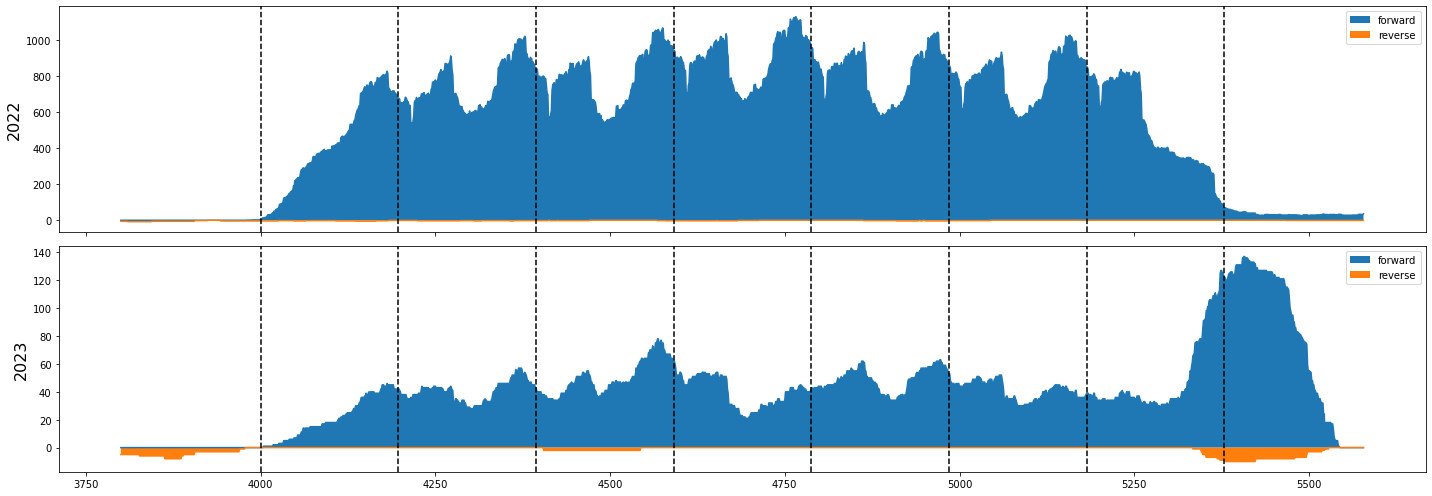

In [48]:
start = 3800
rstart = 4000
signals = np.array([(rna2022_197b_repeat_151_for, rna2022_197b_repeat_151_rev),
                    (rna2023_197b_repeat_151_for, rna2023_197b_repeat_151_rev)])
labels = ['2022', '2023']
fig, axes = plt.subplots(2, 1, figsize=(20, 7), facecolor='w', layout='tight', sharex='col')#, sharey='col')

for i in range(2):
    axes[i].set_ylabel(labels[i], fontsize=16)
    ax = axes[i]
    signal_for, signal_rev = signals[i]
    rid = '197b'
    rlen = int(rid[:3])
    stop = rstart + rlen * 7 + (4000-start)
    if signal_for is not None:
        ax.plot(np.arange(start, stop), signal_for[f'{rid}_7_4kbrf'][start:stop])
        ax.fill_between(np.arange(start, stop), signal_for[f'{rid}_7_4kbrf'][start:stop], label='forward')
        ax.plot(np.arange(start, stop), -signal_rev[f'{rid}_7_4kbrf'][start:stop])
        ax.fill_between(np.arange(start, stop), -signal_rev[f'{rid}_7_4kbrf'][start:stop], label='reverse')
        # ax.plot(np.arange(rstart, rstop), signal_for[f'{rid}_7_4kbrf'][rstart:rstop])
        # ax.fill_between(np.arange(rstart, rstop), signal_for[f'{rid}_7_4kbrf'][rstart:rstop], label='repeat', color=colors[1])
        for reps in range(0, 8):
            ax.axvline(rstart + reps*rlen, color='k', linestyle='--')
        ax.legend()
    else:
        ax.set_axis_off()